# Project: Investigating  FBI NICS Firearm Background Check Data

## Table of Contents
<ul>
    <li>
        <a href="#intro">Introduction</a>
    </li>
    <ul>
        <li>
            <a href="#nics_processs">The NICS Process</a>
        </li>
        <ul>
            <li>
            <a href="#dataset">The Dataset</a>
            </li>
        </ul>
        <li>
            <a href="#census_intro">The US Census Bureau Data</a>
        </li>
        <li>
            <a href="#questions">Questions for Analysis</a>
        </li>
    </ul>
    <li>
    <a href="#wrangling">Data Wrangling</a>
    </li>
    <ul>
        <li>
            <a href="#gun">Cleaning Gun Data</a>
        </li>
        <ul>
            <li>
                <a href="#gun_nan">Fixing NaN</a>
            </li>
            <li>
                <a href="#gun_dtypes">Converting Data Types</a>
            </li>
            <li>
                <a href="#gun_rename">Renaming Columns</a>
            </li>
            <li>
                <a href="#gun_query">Querying</a>
            </li>
            <li>
                <a href="#gun_merge">Splitting & Merging</a>
            </li>
        </ul>
        <li>
            <a href="#census">Cleaning Census Data</a>
        </li>
        <ul>
            <li>
                <a href="#census_duplicates">Dropping Duplicates</a>
            </li>
            <li>
                <a href="#census_transpose">Transposing</a>
            </li>
            <li>
                <a href="#census_trim">Trimming DataFrame</a>
            </li>
            <li>
                <a href="#census_rename">Renaming Columns</a>
            </li>
            <li>
                <a href="#census_dtypes">Converting Data Types</a>
            </li>
            <li>
                <a href="#census_splitting">Splitting</a>
            </li>
        </ul>
        <li>
            <a href="#merge">Merging</a>
        </li>
    </ul>
    <li>
    <a href="#eda">Exploratory Data Analysis</a>
    </li>
       <ul>
            <li>
                <a href="#q1">What state has the highest gun sales in years 2010 & 2016?</a>
            </li>
            <li>
                <a href="#q2">What state saw a significant increase in gun sales six years later?</a>
            </li>
            <li>
                <a href="#q3">Are there disparities in firearm acquisitions among different racial groups?</a>
            </li>
            <li>
                <a href="#q4">Does gender play a role in gun purchases?</a>
            </li>
            <li>
                <a href="#q5">Is the veteran population pertinent to a state's firearm acquisitions?</a>                
            </li>
            <li>
                <a href="#q6">Is there a correlation between states with a greater disparity between the number of housing units and population and levels of gun sales?</a>
            </li>
        </ul>
    <li>
    <a href="#conclusions">Conclusions</a>
    </li>
</ul>

<a id='intro'></a>

## Introduction
In this investigation, we will be utilizing two datasets, the Federal Bureau of Investigation (FBI) National Instant Criminal Background Check System (NICS) data and the U.S. Census Bureau data, to formulate answers to certain questions. Despite the fact that both datasets provide us with valuable information, we must acknowledge the presence of a margin of error in each of them, meaning that the conclusions we draw must be taken with a certain degree of caution. Furthermore, it is important to note that any uncertainty present in the data could lead to discrepancies between our findings and the actual reality of the situation. 

The NICS is integral to the procedure of purchasing a firearm or explosive, as required by federal legislation. It is a background check system that is utilized to verify that those who are trying to purchase such items are not forbidden from doing so under existing law. The NICS is an indispensable tool in preventing firearms and explosives from reaching the hands of individuals who are not legally permitted to possess them, such as those with a criminal record or mental health issues. Every time an individual attempts to purchase a firearm or explosive, the NICS provides a prompt and effective method to confirm that they are not barred from doing so.

The United States Census Bureau, a government agency primarily responsible for the collection of statistical data regarding the population, geography and economy of the country, is devoted to providing accurate and up-to-date information to the public. In addition to collecting the data with precision and care, the Bureau is also committed to protecting the private information of citizens and businesses, as mandated by federal law. The agency strives to guarantee that the data they present is complete and accurate, and is constantly revising its data to reflect any alterations that take place.
<hr>
<a id='nics_processs'></a>

### The NICS Process
When someone attempts to buy a firearm, the seller, known as a Federal Firearms Licensee (FFL), contacts the National Instant Criminal Background Check System (NICS) electronically or by phone. The prospective buyer must fill out the Alcohol, Tobacco, & Firearms (ATF) [form](https://www.atf.gov/firearms/atf-form-4473-firearms-transaction-record-revisions). The FFL then relays that information to NICS. NICS staff performs a background check on the buyer to verify that they do not have a criminal record or are otherwise ineligible to purchase or own a firearm. Since its launch in 1998, NICS has conducted over 300 million checks, leading to more than 1.5 million denials.

<a id='dataset'></a>

### The Dataset
Each column represents a type of transaction submitted to the NICS. Additionally, each type of transaction is broken down by firearm type: handgun, long gun, and other. The Bureau of Alcohol, Tobacco, Firearms and Explosives [defines](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) these firearms as follows:
- Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
- Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either
a number of ball shot or a single projectile for each single pull of the trigger.
- Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

The yellow-highlighted transaction types on the chart are for background checks initiated by a Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency before issuing a firearm-related permit or transfer. "Multiple" indicates a background check with more than one type of firearm, and "admin" denotes administrative checks for other authorized uses of the NICS.

Other [types](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) of transactions are explained below:
- Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.
- Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
- Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.
- Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
- Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
- Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

#### Important Note on the NCIS Data
**It is important to note that the statistics within this dataset represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.**

As noted in a 2015 article by [The Trace](https://www.thetrace.org/2015/11/black-friday-gun-sales-background-checks/),
>These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.

Yet, the article later states that _"Despite those vagaries, the FBI’s NICS numbers are widely accepted as the best proxy for total gun sales in a given time period."_

<hr>
<a id='census_intro'></a>


### The US Census Bureau Data
This investigation will make use of census data from the years 2011-2015 and 2010-2016 for each state. The census data comprises, but is not limited to, population, number of households, value of housing, and other factors.

In this investigation, the following censuses are [defined](https://www.census.gov/quickfacts/fact/table/US/PST045222):
- **Population Estimates:** The Census Bureau's Population Estimates Program (PEP) produces estimates of the population for the United States, its states, counties, cities, and towns, as well as for the Commonwealth of Puerto Rico and its municipios (county-equivalents for Puerto Rico). Additionally, housing unit estimates are produced for the nation, states, and counties. The timing of the release of estimates varies according to the level of geography and demographic detail.
- **Female Persons:** The number of females is expressed as a percent of the total population.
- **White:** A person having origins in any of the original peoples of Europe, the Middle East, or North Africa. It includes people who indicate their race as "White" or report responses such as German, Irish, English, Italian, Lebanese, and Egyptian. The category also includes groups such as Polish, French, Iranian, Slavic, Cajun, Chaldean, etc.
- **Black or African American:** A person having origins in any of the Black racial groups of Africa. It includes people who indicate their race as "Black or African American," or report responses such as African American, Jamaican, Haitian, Nigerian, Ethiopian, or Somali. The category also includes groups such as Ghanaian, South African, Barbadian, Kenyan, Liberian, Bahamian, etc.
- **American Indian and Alaska Native:** A person having origins in any of the original peoples of North and South America (including Central America) and who maintains tribal affiliation or community attachment. This category includes people who indicate their race as "American Indian or Alaska Native" or report entries such as Navajo Nation, Blackfeet Tribe, Mayan, Aztec, Native Village of Barrow Iñupiat Traditional Government, or Nome Eskimo Community.
- **Asian:** A person having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent including, for example, India, China, the Philippine Islands, Japan, Korea, or Vietnam. It includes people who indicate their race as "Asian Indian," "Chinese," "Filipino," "Korean," Japanese," "Vietnamese," and "Other Asian" or provide other detailed Asian responses such as Pakistani, Cambodian, Hmong, Thai, Bengali, Mien, etc.
- **Native Hawaiian and Other Pacific Islander:** A person having origins in any of the original peoples of Hawaii, Guam, Samoa, or other Pacific Islands. It includes people who indicate their race as "Native Hawaiian," "Chamorro," "Samoan," and "Other Pacific Islander" or provide other detailed Pacific Islander responses such as Palauan, Tahitian, Chuukese, Pohnpeian, Saipanese, Yapese, etc.
- **Two or more races:** People may choose to provide two or more races either by checking two or more race response check boxes, by providing multiple responses, or by some combination of check boxes and other responses. The race response categories shown on the questionnaire are collapsed into the five minimum race groups identified by the U.S. Office of Management and Budget (OMB), and the Census Bureau's "Some Other Race" category. For data product purposes, "Two or More Races" refers to combinations of two or more of the following race categories: White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander, or Some Other Race.
- **Hispanic or Latino**: The terms "Hispanic," "Latino," and "Spanish" are used interchangeably. Some respondents identify with all three terms while others may identify with only one of these three specific terms. People who identify with the terms "Hispanic," "Latino," or "Spanish" are those who classify themselves in one of the specific Hispanic, Latino, or Spanish categories listed on the questionnaire ("Mexican, Mexican Am., or Chicano," "Puerto Rican," or "Cuban") as well as those who indicate that they are "another Hispanic, Latino, or Spanish origin." People who do not identify with one of the specific origins listed on the questionnaire but indicate that they are "another Hispanic, Latino, or Spanish origin" are those whose origins are from Spain, the Spanish-speaking countries of Central or South America, or another Spanish culture or origin. Origin can be viewed as the heritage, nationality group, lineage, or country of birth of the person or the person's parents or ancestors before their arrival in the United States. People who identify their origin as Hispanic, Latino, or Spanish may be of any race.
- **Veterans:** Veteran status is used to identify people with active duty military service and service in the military Reserves and the National Guard. Veterans are men and women who have served (even for a short time), but are not currently serving, on active duty in the U.S. Army, Navy, Air Force, Marine Corps, or the Coast Guard, or who served in the U.S. Merchant Marine during World War II. People who served in the National Guard or Reserves are classified as veterans only if they were ever called or ordered to active duty, not counting the initial training or yearly summer camps. All other civilians are classified as nonveterans. While it is possible for 17 year olds to be veterans of the Armed Forces, ACS data products are restricted to the population 18 years and older.
- **Housing Units:** A housing unit is a house, an apartment, a mobile home, a group of rooms, or a single room that is occupied (or if vacant, is intended for occupancy) as separate living quarters. Separate living quarters are those in which the occupants live and eat separately from any other persons in the building and which have direct access from the outside of the building or through a common hall.
- **Median value of owner-occupied housing units:** Value is the respondent's estimate of how much the property (house and lot, mobile home and lot (if lot owned), or condominium unit) would sell for if it were for sale. If the house was owned or being bought, but the land on which it sits was not, the respondent was asked to estimate the combined value of the house and the land. Owners of non-condominium multi-unit buildings who live in one of the building's units, like duplexes and small apartment buildings, should report the value of the building, the land, and any additional buildings on the same plot of land. For vacant units, value was the price asked for the property. This tabulation includes only specified owner-occupied housing units--one-family houses on less than 10 acres without a business or medical office on the property. These data exclude mobile homes, houses with a business or medical office, houses on 10 or more acres, and housing units in multi-unit structures. Certain tabulations elsewhere include the value of all owner-occupied housing units and vacant-for-sale housing units. Also available are data on mortgage status and selected monthly owner costs. The median divides the value distribution into two equal parts: one-half of the cases falling below the median value of the property (house and lot) and one-half above the median. Median value calculations are rounded to the nearest hundred dollars.
- **Households:** A household includes all the the people who occupy a housing unit. (People not living in households are classified as living in group quarters.) A housing unit is a house, an apartment, a mobile home, a group of rooms, or a single room that is occupied (or if vacant, is intended for occupancy) as separate living quarters. Separate living quarters are those in which the occupants live separately from any other people in the building and which have direct access from the outside of the building or through a common hall. The occupants may be a single family, one person living alone, two or more families living together, or any other group of related or unrelated people who share living arrangements. Persons per household, or average household size, is obtained by dividing the number of people in households by the number of households.
- **High School Graduate or Higher:** High School Graduate or higher include people whose highest degree or level of school completed was a high school diploma or its equivalent, people who attended college but did not receive a degree, and people who received an associate, bachelor's, master's, or professional or doctorate degree. People who reported completing the 12th grade but not receiving a diploma are not included. These data shown here include only persons 25 years old and over. The percentages are obtained by dividing the number of persons whose highest degree or level of school completed was high school graduate or higher by the total number of persons 25 years old and over.
- **Bachelor's Degree or Higher:** High Persons with a Bachelor's Degree or Higher are those who have received a bachelor's degree from a college or university, or a master's, professional, or doctorate degree. These data shown here include only persons 25 years old and over. The percentages are obtained by dividing the number of persons whose highest degree or level of school completed was bachelor's degree or higher  by the total number of persons 25 years old and over.

_For a detailed definition of the data, please visit [U.S. Census Bureau QuickFacts: United States](https://www.census.gov/quickfacts/fact/table/US/PST045222)._

<hr>

<a id='questions'></a>


### Question(s) for Analysis
- <a href="#q1">What state has the highest gun sales in years 2010 & 2016?</a>
- <a href="#q2">What state saw a significant increase in gun sales six years later?</a>
- <a href="#q3">Are there disparities in firearm acquisitions among different racial groups?</a>
- <a href="#q4">Does gender play a role in gun purchases?</a>
- <a href="#q5">Is the veteran population pertinent to a state's firearm acquisitions?</a>
- <a href="#q6">Is there a correlation between states with a greater disparity between the number of housing units and population and levels of gun sales?</a>

In [213]:
# Importing different libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [214]:
# Loading NCIS data into a DataFrame
gun = pd.read_excel('gun_data.xlsx')
gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [215]:
# Loading Census data into a DataFrame
census = pd.read_csv('US_Census_Data.csv')
census.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [216]:
gun.shape

(12485, 27)

The `gun` DataFrame consists of 12485 rows & 27 columns

In [217]:
census.shape

(85, 52)

`census` consist of 85 rows & 52 columns on the other hand. Next lets check the data types of each DataFrame

In [218]:
gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [219]:
census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


Now lets check if we have any missing values.

In [220]:
gun.isna().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

It appears that the `gun` data has more than one column with a missing value. Let's use `sum()` to check if the total is insignificant. If so, we could simply drop the rows containing NaN values.

In [221]:
gun.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

That's a lot of missing data; 11385 rows of permit_recheck alone! We'll need to address this before we can proceed with our investigation. We'll do that in the  <a href="#wrangling">wrangling</a> process. Now let's check if census has any missing data too.

In [222]:
census.isna().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [223]:
census.isna().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

Seems pretty significant too (20 out 85 rows in almost all coulmns are missing). We'll fix this in the <a href="#wrangling">wrangling</a> process. Next let's check for any duplicates.

In [224]:
gun.duplicated().any()

False

In [225]:
census.duplicated().any()

True

It appears that only the census data has duplicates. As we said before, we'll handle this in the <a href="#wrangling">wrangling</a> step.

<a id='wrangling'></a>

## Data Wrangling

<a id='gun'></a>

#### Cleaning & preparing different versions of gun data.

We'll start with the gun data we've obtained from the FBI NICS system.

Below is a sample of the gun sales data. We'll view it using the `head()` function.

In [226]:
gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

<a id='gun_nan'></a>

##### Checking for NaN values and replacing any

In [227]:
# Check NaN
gun.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

We have already established that the missing values are significant and will have a major impact on our investigation. To fix this we'll use the `fillna(method=ffill)`, where `ffill` stands for forward fill.

In [228]:
# Filling all NaN values
gun.fillna(method='ffill', inplace=True)

In [229]:
# Checking if all NaN values are replaced
gun.isna().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

Now the `dtypes` attribute reveals that the month column is a string object. Other columns also appear to be in the wrong data format.

In [230]:
gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

<a id='gun_dtypes'></a>

##### Converting data types

In [231]:
# Converting the month column to date
gun['month'] = pd.to_datetime(gun['month'])

In [232]:
# Checking if the type is converted correctly
gun.dtypes[:1]

month    datetime64[ns]
dtype: object

The remaining columns are floats and integers; an integer would be a better representation for the number of gun sales.

In [233]:
# Converting all float columns
for column in gun.columns:
    if gun[column].dtype == 'float64':
        gun[column] = gun[column].astype(int)

In [234]:
# Checking if the data types are converted correctly
gun.dtypes

month                        datetime64[ns]
state                                object
permit                                int64
permit_recheck                        int64
handgun                               int64
long_gun                              int64
other                                 int64
multiple                              int64
admin                                 int64
prepawn_handgun                       int64
prepawn_long_gun                      int64
prepawn_other                         int64
redemption_handgun                    int64
redemption_long_gun                   int64
redemption_other                      int64
returned_handgun                      int64
returned_long_gun                     int64
returned_other                        int64
rentals_handgun                       int64
rentals_long_gun                      int64
private_sale_handgun                  int64
private_sale_long_gun                 int64
private_sale_other              

<a id='gun_rename'></a>

##### Renaming Columns

Now let's rename the month column for a better representation of its data:

In [235]:
# Renaming month column
gun.rename(columns={'month':'date'}, inplace=True)

In [236]:
# Checking if column is renamed correctly
gun.head()

date       state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01     Alabama   16717               0     5734      6320    221   
1 2017-09-01      Alaska     209               2     2320      2930    219   
2 2017-09-01     Arizona    5069             382    11063      7946    920   
3 2017-09-01    Arkansas    2935             632     4347      6063    165   
4 2017-09-01  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317      0               15  ...               0                0   
1       160      0                5  ...               0                0   
2       631      0               13  ...               0                0   
3       366     51               12  ...               0                0   
4         0      0                0  ...               0                0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0                 0                     9                     16   
1                 0                    17                     24   
2                 0                    38                     12   
3                 0                    13                     23   
4                 0                     0                      0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                   3                         0                          0   
1                   1                         0                          0   
2                   2                         0                          0   
3                   0                         0                          2   
4                   0                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 27 columns]

<a id='gun_query'></a>

##### Querying Data

Now in the census data, we're provided with census estimates of the population on _April 2010 &  July 2016_ **only**. Thus, let's query those two dates  for each state and save them to a new DataFrame.

In [237]:
# Querying the needed dates only
gun_10_16 = gun.query(" date == '2010-04-01' or date == '2016-07-01'")

In [238]:
# Checking our new DataFrame
gun_10_16.shape

(110, 27)

Our new DataFrame has 110 rows.

In [239]:
gun_10_16.head()

date       state  permit  permit_recheck  handgun  long_gun  other  \
770 2016-07-01     Alabama   27765               0    10132      7392    538   
771 2016-07-01      Alaska     215               0     2898      2816    239   
772 2016-07-01     Arizona    7863             308    13693      8643   1283   
773 2016-07-01    Arkansas    4116             677     6323      5053    325   
774 2016-07-01  California   77962               0    46361     47594  17297   

     multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
770       465      0                5  ...               0                0   
771       165      0                7  ...               0                0   
772       642      0                5  ...               0                0   
773       367      2                6  ...               0                0   
774         0      0                0  ...               0                0   

     rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
770                 0                     9                      5   
771                 0                     7                     17   
772                 0                    13                      9   
773                 0                     7                      5   
774                 0                     0                      0   

     private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
770                   0                         1                          1   
771                   0                         1                          0   
772                   0                         0                          1   
773                   1                         0                          1   
774                   0                         0                          0   

     return_to_seller_other  totals  
770                       0   48927  
771                       0    6793  
772                       0   34496  
773                       0   19378  
774                       0  190218  

[5 rows x 27 columns]

In [240]:
# Checking that no dates before April 2010 are included
gun_10_16['date'].min()

Timestamp('2010-04-01 00:00:00')

In [241]:
# Checking that no dates after July 2016 are included
gun_10_16['date'].max()

Timestamp('2016-07-01 00:00:00')

<a id='gun_merge'></a>

##### Splitting & Merging

Now let's split this DataFrame into two DataFrames, 2010 DataFrame & 2016 DataFrame

In [242]:
# April 2010 DataFrame
gun_10 = gun_10_16.query("date == '2010-04-01'")
gun_10.shape

(55, 27)

In [243]:
# July 2016 DataFrame
gun_16 = gun_10_16.query("date == '2016-07-01'")
gun_16.shape

(55, 27)

Now let's suffix each DataFrame's column with they year they're representing.

In [244]:
# Renaming 2010 columns
gun_10.rename(columns=lambda x: x[:] + "_10", inplace=True)

/var/folders/pv/_9y9l5952gb2nnsvywfkytzh0000gn/T/ipykernel_88982/837088757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_10.rename(columns=lambda x: x[:] + "_10", inplace=True)


In [245]:
gun_10.head()

date_10    state_10  permit_10  permit_recheck_10  handgun_10  \
4895 2010-04-01     Alabama        396                  0        8727   
4896 2010-04-01      Alaska          0                  0        2650   
4897 2010-04-01     Arizona       1905                  0        7787   
4898 2010-04-01    Arkansas       4303                  0        3865   
4899 2010-04-01  California      26930                  0       26170   

      long_gun_10  other_10  multiple_10  admin_10  prepawn_handgun_10  ...  \
4895         8095       131          394         0                   8  ...   
4896         3136        64          135         0                  10  ...   
4897         5097       198          309         0                   4  ...   
4898         3833        45          197         1                  12  ...   
4899        27650         0            0         0                   0  ...   

      returned_other_10  rentals_handgun_10  rentals_long_gun_10  \
4895                  0                   0                    0   
4896                  0                   0                    0   
4897                  0                   0                    0   
4898                  0                   0                    0   
4899                  0                   0                    0   

      private_sale_handgun_10  private_sale_long_gun_10  \
4895                        0                         0   
4896                        0                         0   
4897                        0                         0   
4898                        0                         0   
4899                        0                         0   

      private_sale_other_10  return_to_seller_handgun_10  \
4895                      0                            0   
4896                      0                            0   
4897                      0                            0   
4898                      0                            0   
4899                      0                            0   

      return_to_seller_long_gun_10  return_to_seller_other_10  totals_10  
4895                             0                          0      20791  
4896                             0                          0       6411  
4897                             0                          0      16578  
4898                             0                          0      14563  
4899                             0                          0      80750  

[5 rows x 27 columns]

In [246]:
# Renaming 2016 columns
gun_16.rename(columns=lambda x: x[:] + "_16", inplace=True)

/var/folders/pv/_9y9l5952gb2nnsvywfkytzh0000gn/T/ipykernel_88982/1099019036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_16.rename(columns=lambda x: x[:] + "_16", inplace=True)


In [247]:
gun_16.head()

date_16    state_16  permit_16  permit_recheck_16  handgun_16  \
770 2016-07-01     Alabama      27765                  0       10132   
771 2016-07-01      Alaska        215                  0        2898   
772 2016-07-01     Arizona       7863                308       13693   
773 2016-07-01    Arkansas       4116                677        6323   
774 2016-07-01  California      77962                  0       46361   

     long_gun_16  other_16  multiple_16  admin_16  prepawn_handgun_16  ...  \
770         7392       538          465         0                   5  ...   
771         2816       239          165         0                   7  ...   
772         8643      1283          642         0                   5  ...   
773         5053       325          367         2                   6  ...   
774        47594     17297            0         0                   0  ...   

     returned_other_16  rentals_handgun_16  rentals_long_gun_16  \
770                  0                   0                    0   
771                  0                   0                    0   
772                  0                   0                    0   
773                  0                   0                    0   
774                  0                   0                    0   

     private_sale_handgun_16  private_sale_long_gun_16  private_sale_other_16  \
770                        9                         5                      0   
771                        7                        17                      0   
772                       13                         9                      0   
773                        7                         5                      1   
774                        0                         0                      0   

     return_to_seller_handgun_16  return_to_seller_long_gun_16  \
770                            1                             1   
771                            1                             0   
772                            0                             1   
773                            0                             1   
774                            0                             0   

     return_to_seller_other_16  totals_16  
770                          0      48927  
771                          0       6793  
772                          0      34496  
773                          0      19378  
774                          0     190218  

[5 rows x 27 columns]

Now we'll only use the state and total columns to create a new DataFrame that displays the total sales for each state.

In [248]:
# Selecting only state and totals from the gun_10 gun DataFrame
gun_totals_10 = pd.DataFrame(gun_10.groupby(['state_10'])['totals_10'].sum())

In [249]:
gun_totals_10.head()

totals_10
state_10             
Alabama         20791
Alaska           6411
Arizona         16578
Arkansas        14563
California      80750

In [250]:
# Ressetting index to make sure state_10 is a column
gun_totals_10.reset_index(inplace=True)

In [251]:
# Checking if the column state_10 is now not an index
gun_totals_10.shape

(55, 2)

In [252]:
gun_totals_10.head()

state_10  totals_10
0     Alabama      20791
1      Alaska       6411
2     Arizona      16578
3    Arkansas      14563
4  California      80750

In [253]:
# Selecting only state and totals from the gun_16 gun DataFrame
gun_totals_16 = pd.DataFrame(gun_16.groupby(['state_16'])['totals_16'].sum())

In [254]:
gun_totals_16.reset_index(inplace=True)
gun_totals_16.head()

state_16  totals_16
0     Alabama      48927
1      Alaska       6793
2     Arizona      34496
3    Arkansas      19378
4  California     190218

In [255]:
gun_totals_16.shape

(55, 2)

Now lets merge the two DataFrames to create a combined DataFrame which represents the totals of each state on in each year. To do this we need to first rename the state columns in both DataFrames. We do this because we need the state to act as the _key_ we'll be merging on.

In [256]:
gun_totals_10.rename(columns={'state_10':'state'}, inplace=True)
gun_totals_16.rename(columns={'state_16':'state'}, inplace=True)

In [257]:
gun_totals_10.head()

state  totals_10
0     Alabama      20791
1      Alaska       6411
2     Arizona      16578
3    Arkansas      14563
4  California      80750

In [258]:
gun_totals_16.head()

state  totals_16
0     Alabama      48927
1      Alaska       6793
2     Arizona      34496
3    Arkansas      19378
4  California     190218

Now lets use the inner join method using state as the key to merge on.

In [259]:
# merge datasets
gun_totals_10_16 = gun_totals_16.merge(gun_totals_10, on='state')

In [260]:
gun_totals_10_16.head()

state  totals_16  totals_10
0     Alabama      48927      20791
1      Alaska       6793       6411
2     Arizona      34496      16578
3    Arkansas      19378      14563
4  California     190218      80750

In [261]:
gun_totals_10_16.shape

(55, 3)

The census data also provides estimates for items other than population between 2011 and 2015. Let's prepare a copy of gun data for this period.

In [262]:
gun.head()

date       state  permit  permit_recheck  handgun  long_gun  other  \
0 2017-09-01     Alabama   16717               0     5734      6320    221   
1 2017-09-01      Alaska     209               2     2320      2930    219   
2 2017-09-01     Arizona    5069             382    11063      7946    920   
3 2017-09-01    Arkansas    2935             632     4347      6063    165   
4 2017-09-01  California   57839               0    37165     24581   2984   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317      0               15  ...               0                0   
1       160      0                5  ...               0                0   
2       631      0               13  ...               0                0   
3       366     51               12  ...               0                0   
4         0      0                0  ...               0                0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0                 0                     9                     16   
1                 0                    17                     24   
2                 0                    38                     12   
3                 0                    13                     23   
4                 0                     0                      0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                   3                         0                          0   
1                   1                         0                          0   
2                   2                         0                          0   
3                   0                         0                          2   
4                   0                         0                          0   

   return_to_seller_other  totals  
0                       3   32019  
1                       0    6303  
2                       0   28394  
3                       1   17747  
4                       0  123506  

[5 rows x 27 columns]

In [263]:
# Querying rows for the period 2011-2015
gun_11_15 = gun.query("'2011-01-01'<= date < '2015-01-01'")

In [264]:
gun_11_15.head()

date       state  permit  permit_recheck  handgun  long_gun  other  \
1815 2014-12-01     Alabama   16469               0    23630     29449    773   
1816 2014-12-01      Alaska     212               0     4259      4189    305   
1817 2014-12-01     Arizona    3892               0    14200     11509    842   
1818 2014-12-01    Arkansas    3675               0     8260     14121    191   
1819 2014-12-01  California   41907               0    66770     47409   6956   

      multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
1815      1130      0                8  ...               0                0   
1816       202      0                7  ...               0                0   
1817       588      0                4  ...               0                0   
1818       398      0                6  ...               0                0   
1819         0      0                0  ...               0                0   

      rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
1815                 0                     0                      0   
1816                 0                     0                      0   
1817                 0                     0                      0   
1818                 0                     0                      0   
1819                 0                     0                      0   

      private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
1815                   0                         0                          0   
1816                   0                         0                          0   
1817                   0                         0                          0   
1818                   0                         0                          0   
1819                   0                         0                          0   

      return_to_seller_other  totals  
1815                       0   75874  
1816                       0    9442  
1817                       0   33062  
1818                       0   29453  
1819                       0  164170  

[5 rows x 27 columns]

In [265]:
# Checking that no dates before January 2011 are included
gun_11_15['date'].min()

Timestamp('2011-01-01 00:00:00')

In [266]:
# Checking that no dates after December 2014 are included
gun_11_15['date'].max()

Timestamp('2014-12-01 00:00:00')

Now let's select only the state and totals for our 2011-2015 DataFrame. We will accomplish this by summing the total sales of the period 2011-2015 for each state.

In [267]:
# Summing all years from 2011 to 2015 for each state and grouping by state
gun_totals_11_15 = pd.DataFrame(gun_11_15.groupby(['state'])['totals'].sum())

In [268]:
gun_totals_11_15.head()

totals
state              
Alabama     1952643
Alaska       336568
Arizona     1264848
Arkansas     966439
California  4881215

In [269]:
# Resetting index
gun_totals_11_15.reset_index(inplace=True)

In [270]:
gun_totals_11_15.head()

state   totals
0     Alabama  1952643
1      Alaska   336568
2     Arizona  1264848
3    Arkansas   966439
4  California  4881215

<a id='census'></a>
#### Cleaning & preparing different versions of census data.

<a id='census_duplicates'></a>
##### Dropping Duplicates

First of all, let's drop the 3 duplicated rows we've checked for at the beginning.

In [271]:
census.shape

(85, 52)

In [272]:
# Number of duplicates
census.duplicated().sum()

3

In [273]:
# Dropping duplicates
census.drop_duplicates(inplace=True)

In [274]:
# Checking if the rows are dropped
census.shape

(82, 52)

Now let's display census column names.

In [275]:
census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [276]:
census.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

Comparing gun data to census data shows that gun rows has census's column names. We will fix this by transposing the `census` DataFrame.

<a id='census_transpose'></a>
##### Transposing

In [277]:
# Transposing census
census = census.transpose()
census.head()

0   \
Fact       Population estimates, July 1, 2016,  (V2016)   
Fact Note                                           NaN   
Alabama                                       4,863,300   
Alaska                                          741,894   
Arizona                                       6,931,071   

                                                          1   \
Fact       Population estimates base, April 1, 2010,  (V2...   
Fact Note                                                NaN   
Alabama                                            4,780,131   
Alaska                                               710,249   
Arizona                                            6,392,301   

                                                          2   \
Fact       Population, percent change - April 1, 2010 (es...   
Fact Note                                                NaN   
Alabama                                                1.70%   
Alaska                                                 4.50%   
Arizona                                                8.40%   

                                          3   \
Fact       Population, Census, April 1, 2010   
Fact Note                                NaN   
Alabama                            4,779,736   
Alaska                               710,231   
Arizona                            6,392,017   

                                                          4   \
Fact       Persons under 5 years, percent, July 1, 2016, ...   
Fact Note                                                NaN   
Alabama                                                6.00%   
Alaska                                                 7.30%   
Arizona                                                6.30%   

                                                      5   \
Fact       Persons under 5 years, percent, April 1, 2010   
Fact Note                                            NaN   
Alabama                                            6.40%   
Alaska                                             7.60%   
Arizona                                            7.10%   

                                                          6   \
Fact       Persons under 18 years, percent, July 1, 2016,...   
Fact Note                                                NaN   
Alabama                                               22.60%   
Alaska                                                25.20%   
Arizona                                               23.50%   

                                                       7   \
Fact       Persons under 18 years, percent, April 1, 2010   
Fact Note                                             NaN   
Alabama                                            23.70%   
Alaska                                             26.40%   
Arizona                                            25.50%   

                                                          8   \
Fact       Persons 65 years and over, percent,  July 1, 2...   
Fact Note                                                NaN   
Alabama                                               16.10%   
Alaska                                                10.40%   
Arizona                                               16.90%   

                                                          9   ...  \
Fact       Persons 65 years and over, percent, April 1, 2010  ...   
Fact Note                                                NaN  ...   
Alabama                                               13.80%  ...   
Alaska                                                 7.70%  ...   
Arizona                                               13.80%  ...   

                                                          74           76  \
Fact                                                     (c)  Value Flags   
Fact Note  Economic Census - Puerto Rico data are not com...          NaN   
Alabama                                                  NaN          NaN   
Alaska                           

In [278]:
# Displaying our newly transposed column names
census.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68,
            69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84],
           dtype='int64')

Let's rename the column names using the first Fact row instead of the numerical names

In [279]:
census.rename(columns=census.iloc[0], inplace=True)
census.head()

Population estimates, July 1, 2016,  (V2016)  \
Fact       Population estimates, July 1, 2016,  (V2016)   
Fact Note                                           NaN   
Alabama                                       4,863,300   
Alaska                                          741,894   
Arizona                                       6,931,071   

          Population estimates base, April 1, 2010,  (V2016)  \
Fact       Population estimates base, April 1, 2010,  (V2...   
Fact Note                                                NaN   
Alabama                                            4,780,131   
Alaska                                               710,249   
Arizona                                            6,392,301   

          Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
Fact       Population, percent change - April 1, 2010 (es...                                      
Fact Note                                                NaN                                      
Alabama                                                1.70%                                      
Alaska                                                 4.50%                                      
Arizona                                                8.40%                                      

           Population, Census, April 1, 2010  \
Fact       Population, Census, April 1, 2010   
Fact Note                                NaN   
Alabama                            4,779,736   
Alaska                               710,231   
Arizona                            6,392,017   

          Persons under 5 years, percent, July 1, 2016,  (V2016)  \
Fact       Persons under 5 years, percent, July 1, 2016, ...       
Fact Note                                                NaN       
Alabama                                                6.00%       
Alaska                                                 7.30%       
Arizona                                                6.30%       

           Persons under 5 years, percent, April 1, 2010  \
Fact       Persons under 5 years, percent, April 1, 2010   
Fact Note                                            NaN   
Alabama                                            6.40%   
Alaska                                             7.60%   
Arizona                                            7.10%   

          Persons under 18 years, percent, July 1, 2016,  (V2016)  \
Fact       Persons under 18 years, percent, July 1, 2016,...        
Fact Note                                                NaN        
Alabama                                               22.60%        
Alaska                                                25.20%        
Arizona                                               23.50%        

           Persons under 18 years, percent, April 1, 2010  \
Fact       Persons under 18 years, percent, April 1, 2010   
Fact Note                                             NaN   
Alabama                                            23.70%   
Alaska                                             26.40%   
Arizona                                            25.50%   

          Persons 65 years and over, percent,  July 1, 2016,  (V2016)  \
Fact       Persons 65 years and over, percent,  July 1, 2...            
Fact Note                                                NaN            
Alabama                                               16.10%            
Alaska                                                10.40%            
Arizona                                               16.90%            

           Persons 65 years and over, percent, April 1, 2010  ...  \
Fact       Persons 65 years and over, percent, April 1, 2010  ...   
Fact Note                                                NaN  ...   
Alabama                                               13.80%  ...   
Alaska                                                 7.70%  ...   
Arizona                                            

It appears that the Fact Note row is irrelevant to our investigation. Thus, it should be excluded.

In [280]:
# Dropping Fact Note row
census.drop('Fact Note', inplace=True, axis=0)

In [281]:
census.head(3)

Population estimates, July 1, 2016,  (V2016)  \
Fact     Population estimates, July 1, 2016,  (V2016)   
Alabama                                     4,863,300   
Alaska                                        741,894   

        Population estimates base, April 1, 2010,  (V2016)  \
Fact     Population estimates base, April 1, 2010,  (V2...   
Alabama                                          4,780,131   
Alaska                                             710,249   

        Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
Fact     Population, percent change - April 1, 2010 (es...                                      
Alabama                                              1.70%                                      
Alaska                                               4.50%                                      

         Population, Census, April 1, 2010  \
Fact     Population, Census, April 1, 2010   
Alabama                          4,779,736   
Alaska                             710,231   

        Persons under 5 years, percent, July 1, 2016,  (V2016)  \
Fact     Persons under 5 years, percent, July 1, 2016, ...       
Alabama                                              6.00%       
Alaska                                               7.30%       

         Persons under 5 years, percent, April 1, 2010  \
Fact     Persons under 5 years, percent, April 1, 2010   
Alabama                                          6.40%   
Alaska                                           7.60%   

        Persons under 18 years, percent, July 1, 2016,  (V2016)  \
Fact     Persons under 18 years, percent, July 1, 2016,...        
Alabama                                             22.60%        
Alaska                                              25.20%        

         Persons under 18 years, percent, April 1, 2010  \
Fact     Persons under 18 years, percent, April 1, 2010   
Alabama                                          23.70%   
Alaska                                           26.40%   

        Persons 65 years and over, percent,  July 1, 2016,  (V2016)  \
Fact     Persons 65 years and over, percent,  July 1, 2...            
Alabama                                             16.10%            
Alaska                                              10.40%            

         Persons 65 years and over, percent, April 1, 2010  ...  (c)  \
Fact     Persons 65 years and over, percent, April 1, 2010  ...  (c)   
Alabama                                             13.80%  ...  NaN   
Alaska                                               7.70%  ...  NaN   

         Value Flags    -    D    F   FN  NaN    S    X    Z  
Fact     Value Flags    -    D    F   FN  NaN    S    X    Z  
Alabama          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Alaska           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 82 columns]

We've already used the Fact row to rename our columns. So let's drop it too.

In [282]:
census.drop("Fact", inplace=True, axis=0)
census.head(3)

Population estimates, July 1, 2016,  (V2016)  \
Alabama                                    4,863,300   
Alaska                                       741,894   
Arizona                                    6,931,071   

        Population estimates base, April 1, 2010,  (V2016)  \
Alabama                                          4,780,131   
Alaska                                             710,249   
Arizona                                          6,392,301   

        Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
Alabama                                              1.70%                                      
Alaska                                               4.50%                                      
Arizona                                              8.40%                                      

        Population, Census, April 1, 2010  \
Alabama                         4,779,736   
Alaska                            710,231   
Arizona                         6,392,017   

        Persons under 5 years, percent, July 1, 2016,  (V2016)  \
Alabama                                              6.00%       
Alaska                                               7.30%       
Arizona                                              6.30%       

        Persons under 5 years, percent, April 1, 2010  \
Alabama                                         6.40%   
Alaska                                          7.60%   
Arizona                                         7.10%   

        Persons under 18 years, percent, July 1, 2016,  (V2016)  \
Alabama                                             22.60%        
Alaska                                              25.20%        
Arizona                                             23.50%        

        Persons under 18 years, percent, April 1, 2010  \
Alabama                                         23.70%   
Alaska                                          26.40%   
Arizona                                         25.50%   

        Persons 65 years and over, percent,  July 1, 2016,  (V2016)  \
Alabama                                             16.10%            
Alaska                                              10.40%            
Arizona                                             16.90%            

        Persons 65 years and over, percent, April 1, 2010  ...  (c)  \
Alabama                                            13.80%  ...  NaN   
Alaska                                              7.70%  ...  NaN   
Arizona                                            13.80%  ...  NaN   

        Value Flags    -    D    F   FN  NaN    S    X    Z  
Alabama         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Alaska          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Arizona         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 82 columns]

Now we need to add the state column again and reset our index.

In [283]:
census.reset_index(inplace=True)

Now let's rename it correctly.

In [284]:
census.rename(columns={'index':'state'}, inplace=True)

In [285]:
census.head(3)

state Population estimates, July 1, 2016,  (V2016)  \
0  Alabama                                    4,863,300   
1   Alaska                                      741,894   
2  Arizona                                    6,931,071   

  Population estimates base, April 1, 2010,  (V2016)  \
0                                          4,780,131   
1                                            710,249   
2                                          6,392,301   

  Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                              1.70%                                      
1                                              4.50%                                      
2                                              8.40%                                      

  Population, Census, April 1, 2010  \
0                         4,779,736   
1                           710,231   
2                         6,392,017   

  Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                              6.00%       
1                                              7.30%       
2                                              6.30%       

  Persons under 5 years, percent, April 1, 2010  \
0                                         6.40%   
1                                         7.60%   
2                                         7.10%   

  Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                             22.60%        
1                                             25.20%        
2                                             23.50%        

  Persons under 18 years, percent, April 1, 2010  \
0                                         23.70%   
1                                         26.40%   
2                                         25.50%   

  Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ...  (c)  \
0                                             16.10%           ...  NaN   
1                                             10.40%           ...  NaN   
2                                             16.90%           ...  NaN   

  Value Flags    -    D    F   FN  NaN    S    X    Z  
0         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 83 columns]

In [286]:
census.shape

(50, 83)

<a id='census_trim'></a>
##### Trimming 

Let's now select only the columns that are relevant to our investigation, to declutter our DataFrame.

In [287]:
# Display column names
census.columns

Index([                                                                                 'state',
                                                 'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                              

By inspecting the column titles, we can discern that only a few of them are pertinent to our <a href="#questions">questions</a>. As such, it is unnecessary to retain the other columns. We can do this by copying the columns we need into a new DataFrame using the `copy()` method.

In [288]:
census_trimmed = census[[
    'state',
    'Population estimates, July 1, 2016,  (V2016)',
    'Population estimates base, April 1, 2010,  (V2016)',
    'Female persons, percent,  July 1, 2016,  (V2016)',
    'Female persons, percent, April 1, 2010',
    'White alone, percent, July 1, 2016,  (V2016)',
    'Black or African American alone, percent, July 1, 2016,  (V2016)',
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
    'Two or More Races, percent, July 1, 2016,  (V2016)',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
    'Veterans, 2011-2015',
    'Housing units,  July 1, 2016,  (V2016)',
    'Housing units, April 1, 2010',
    'Median value of owner-occupied housing units, 2011-2015',
    'Households, 2011-2015',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
    '''Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015'''
]].copy()

In [289]:
census_trimmed.columns

Index(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015', 'Housing units,  July 1, 2016,  (V2016)',
       'Housing units, April 1, 2010',
       'Median value of owner-occupied housing units, 2011-2015',
       'Households, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2

<a id='census_rename'></a>
##### Renaming Columns

Let's rename the columns with concise, descriptive names instead of their long names.

In [290]:
census_trimmed.rename(columns={
    'Population estimates, July 1, 2016,  (V2016)'
    :
    'population_16',
    'Population estimates base, April 1, 2010,  (V2016)'
    :
    'population_10',
    'White alone, percent, July 1, 2016,  (V2016)'
    :
    'white_16',
    'Black or African American alone, percent, July 1, 2016,  (V2016)'
    :
    'black_african_american_16',
    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)'
    :
    'american_indian_alaska_native_16',
    'Asian alone, percent, July 1, 2016,  (V2016)'
    :
    'asian_16',
    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'
    :
    'native_hawaiian_other_pacific_islander_16',
    'Two or More Races, percent, July 1, 2016,  (V2016)'
    :
    'two_or_more_races_16',
    'Hispanic or Latino, percent, July 1, 2016,  (V2016)'
    :
    'hispanic_latino_16',
    'Female persons, percent,  July 1, 2016,  (V2016)'
    :
    'female_16',
    'Female persons, percent, April 1, 2010'
    :
    'female_10',
    'Housing units,  July 1, 2016,  (V2016)'
    :
    'housing_16',
    'Housing units, April 1, 2010'
    :
    'housing_10',
    'Veterans, 2011-2015'
    :
    'veterans_11_15',
    'Median value of owner-occupied housing units, 2011-2015'
    :
    'house_median_value_11_15',
    'Households, 2011-2015'
    :
    'households_11_15',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015'
    :
    'high_school_11_15',
    '''Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015'''
    :
    'bachelor_11_15'
}, inplace=True)

In [291]:
# Checking that columns are renamed correctly
census_trimmed.columns

Index(['state', 'population_16', 'population_10', 'female_16', 'female_10',
       'white_16', 'black_african_american_16',
       'american_indian_alaska_native_16', 'asian_16',
       'native_hawaiian_other_pacific_islander_16', 'two_or_more_races_16',
       'hispanic_latino_16', 'veterans_11_15', 'housing_16', 'housing_10',
       'house_median_value_11_15', 'households_11_15', 'high_school_11_15',
       'bachelor_11_15'],
      dtype='object')

<a id='census_dtypes'></a>
##### Converting Data Types

Let's check the data types of our columns.

In [292]:
census_trimmed.dtypes

state                                        object
population_16                                object
population_10                                object
female_16                                    object
female_10                                    object
white_16                                     object
black_african_american_16                    object
american_indian_alaska_native_16             object
asian_16                                     object
native_hawaiian_other_pacific_islander_16    object
two_or_more_races_16                         object
hispanic_latino_16                           object
veterans_11_15                               object
housing_16                                   object
housing_10                                   object
house_median_value_11_15                     object
households_11_15                             object
high_school_11_15                            object
bachelor_11_15                               object
dtype: objec

In [293]:
census_trimmed.head(3)

state population_16 population_10 female_16 female_10 white_16  \
0  Alabama     4,863,300     4,780,131    51.60%    51.50%   69.30%   
1   Alaska       741,894       710,249    47.70%    48.00%   66.10%   
2  Arizona     6,931,071     6,392,301    50.30%    50.30%   83.30%   

  black_african_american_16 american_indian_alaska_native_16 asian_16  \
0                    26.80%                            0.70%    1.40%   
1                     3.80%                           15.20%    6.30%   
2                     4.90%                            5.40%    3.40%   

  native_hawaiian_other_pacific_islander_16 two_or_more_races_16  \
0                                     0.10%                1.60%   
1                                     1.30%                7.30%   
2                                     0.30%                2.80%   

  hispanic_latino_16 veterans_11_15 housing_16 housing_10  \
0              4.20%        363,170  2,230,185  2,171,853   
1              7.00%         69,323    310,658    306,967   
2             30.90%        505,794  2,961,003  2,844,526   

  house_median_value_11_15 households_11_15 high_school_11_15 bachelor_11_15  
0                $125,500         1,848,325            84.30%         23.50%  
1                $250,000           250,969            92.10%         28.00%  
2                $167,500         2,412,212            86.00%         27.50%

It appears that all columns have an object data type; _i.e., a string_. An examination of the DataFrame contents reveals that this is not the correct representation. Let's try converting the data types using `astype()` method.

In [294]:
# Converting first two rows to integers; the population rows.
census_trimmed = census_trimmed.astype({col: int for col in census_trimmed.columns[1:3]})

ValueError: invalid literal for int() with base 10: '4,863,300'

The error above:
>ValueError: invalid literal for int() with base 10: '4,863,300'

is due to the commas included in the string. Looking at the data again shows that almost all columns have some sort of special character ($, \%, etc) that needs to be removed before any successful conversion. Let's try removing characters.

In [295]:
# Removing commas.
census_trimmed.replace(',','', regex=True, inplace=True)

In [296]:
census_trimmed.head(3)

state population_16 population_10 female_16 female_10 white_16  \
0  Alabama       4863300       4780131    51.60%    51.50%   69.30%   
1   Alaska        741894        710249    47.70%    48.00%   66.10%   
2  Arizona       6931071       6392301    50.30%    50.30%   83.30%   

  black_african_american_16 american_indian_alaska_native_16 asian_16  \
0                    26.80%                            0.70%    1.40%   
1                     3.80%                           15.20%    6.30%   
2                     4.90%                            5.40%    3.40%   

  native_hawaiian_other_pacific_islander_16 two_or_more_races_16  \
0                                     0.10%                1.60%   
1                                     1.30%                7.30%   
2                                     0.30%                2.80%   

  hispanic_latino_16 veterans_11_15 housing_16 housing_10  \
0              4.20%         363170    2230185    2171853   
1              7.00%          69323     310658     306967   
2             30.90%         505794    2961003    2844526   

  house_median_value_11_15 households_11_15 high_school_11_15 bachelor_11_15  
0                 $125500           1848325            84.30%         23.50%  
1                 $250000            250969            92.10%         28.00%  
2                 $167500           2412212            86.00%         27.50%

In [297]:
# Trying to convert population columns again.
census_trimmed = census_trimmed.astype({col: int for col in census_trimmed.columns[1:3]})

In [298]:
census_trimmed.dtypes[1:3]

population_16    int64
population_10    int64
dtype: object

In [299]:
# Removing other characters.
census_trimmed.replace(r'\%|\$', '', regex=True, inplace=True)
census_trimmed.head()

state  population_16  population_10 female_16 female_10 white_16  \
0     Alabama        4863300        4780131     51.60     51.50    69.30   
1      Alaska         741894         710249     47.70     48.00    66.10   
2     Arizona        6931071        6392301     50.30     50.30    83.30   
3    Arkansas        2988248        2916025     50.90     50.90    79.40   
4  California       39250017       37254522     50.30     50.30    72.70   

  black_african_american_16 american_indian_alaska_native_16 asian_16  \
0                     26.80                             0.70     1.40   
1                      3.80                            15.20     6.30   
2                      4.90                             5.40     3.40   
3                     15.70                             1.00     1.60   
4                      6.50                             1.70    14.80   

  native_hawaiian_other_pacific_islander_16 two_or_more_races_16  \
0                                      0.10                 1.60   
1                                      1.30                 7.30   
2                                      0.30                 2.80   
3                                      0.30                 2.00   
4                                      0.50                 3.80   

  hispanic_latino_16 veterans_11_15 housing_16 housing_10  \
0               4.20         363170    2230185    2171853   
1               7.00          69323     310658     306967   
2              30.90         505794    2961003    2844526   
3               7.30         220953    1354762    1316299   
4              38.90        1777410   14060525   13680081   

  house_median_value_11_15 households_11_15 high_school_11_15 bachelor_11_15  
0                  125500           1848325             84.30          23.50  
1                  250000            250969             92.10          28.00  
2                  167500           2412212             86.00          27.50  
3                  111400           1138025             84.80          21.10  
4                  385500          12717801             81.80          31.40

In [300]:
# Getting female_16 index
census_trimmed.columns.get_loc('female_16')

3

In [301]:
# Getting hispanic_latino_16 index
census_trimmed.columns.get_loc('hispanic_latino_16')

11

In [302]:
# Getting high_school_11_15 index
census_trimmed.columns.get_loc('high_school_11_15')

17

In [303]:
# Converting to float
census_trimmed = census_trimmed.astype({col: float for col in census_trimmed.columns[3:12]})

ValueError: could not convert string to float: 'Z'

The error above shows that a letter is included in a column instead of numerical value.
>ValueError: could not convert string to float: 'Z'

Referring to the original census data reveals that certain letters have been substituted for numerical values. To convert our columns data type, we must remove the letters first.We'll create a copy of `census_trimmed` called `census_trimmed_copy` and convert all strings to numeric or NaN. This means that the state column will be lost (_because it's of type object_), so we'll need to create a separate copy to add the state column back.

In [304]:
# Copy census_trimmed DataFrame. 
census_trimmed_copy = census_trimmed.copy()

In [305]:
# Convert all strings to numeric or NaN
census_trimmed = census_trimmed.apply(pd.to_numeric, errors='coerce')

In [306]:
# Drop the corrupted state column
census_trimmed.drop(columns='state', inplace=True)

In [307]:
# Add state again using census_trimmed_copy
census_trimmed.insert(0, 'state', value=census_trimmed_copy['state'])

In [308]:
census_trimmed.head()

state  population_16  population_10  female_16  female_10  white_16  \
0     Alabama        4863300        4780131       51.6       51.5      69.3   
1      Alaska         741894         710249       47.7       48.0      66.1   
2     Arizona        6931071        6392301       50.3       50.3      83.3   
3    Arkansas        2988248        2916025       50.9       50.9      79.4   
4  California       39250017       37254522       50.3       50.3      72.7   

   black_african_american_16  american_indian_alaska_native_16  asian_16  \
0                       26.8                               0.7       1.4   
1                        3.8                              15.2       6.3   
2                        4.9                               5.4       3.4   
3                       15.7                               1.0       1.6   
4                        6.5                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  veterans_11_15  housing_16  housing_10  \
0                 4.2          363170     2230185     2171853   
1                 7.0           69323      310658      306967   
2                30.9          505794     2961003     2844526   
3                 7.3          220953     1354762     1316299   
4                38.9         1777410    14060525    13680081   

   house_median_value_11_15  households_11_15  high_school_11_15  \
0                    125500           1848325               84.3   
1                    250000            250969               92.1   
2                    167500           2412212               86.0   
3                    111400           1138025               84.8   
4                    385500          12717801               81.8   

   bachelor_11_15  
0            23.5  
1            28.0  
2            27.5  
3            21.1  
4            31.4

In [309]:
# Check that data types are correct.
census_trimmed.dtypes

state                                         object
population_16                                  int64
population_10                                  int64
female_16                                    float64
female_10                                    float64
white_16                                     float64
black_african_american_16                    float64
american_indian_alaska_native_16             float64
asian_16                                     float64
native_hawaiian_other_pacific_islander_16    float64
two_or_more_races_16                         float64
hispanic_latino_16                           float64
veterans_11_15                                 int64
housing_16                                     int64
housing_10                                     int64
house_median_value_11_15                       int64
households_11_15                               int64
high_school_11_15                            float64
bachelor_11_15                               f

Now let's remove the "null" values we've replaced the letters with.

In [310]:
# Check NaN total
census_trimmed.isna().sum()

state                                        0
population_16                                0
population_10                                0
female_16                                    0
female_10                                    0
white_16                                     0
black_african_american_16                    0
american_indian_alaska_native_16             0
asian_16                                     0
native_hawaiian_other_pacific_islander_16    4
two_or_more_races_16                         0
hispanic_latino_16                           0
veterans_11_15                               0
housing_16                                   0
housing_10                                   0
house_median_value_11_15                     0
households_11_15                             0
high_school_11_15                            0
bachelor_11_15                               0
dtype: int64

In [311]:
census_trimmed.fillna(method='ffill', inplace=True)

In [312]:
# Check new NaN total
census_trimmed.isna().sum()

state                                        0
population_16                                0
population_10                                0
female_16                                    0
female_10                                    0
white_16                                     0
black_african_american_16                    0
american_indian_alaska_native_16             0
asian_16                                     0
native_hawaiian_other_pacific_islander_16    0
two_or_more_races_16                         0
hispanic_latino_16                           0
veterans_11_15                               0
housing_16                                   0
housing_10                                   0
house_median_value_11_15                     0
households_11_15                             0
high_school_11_15                            0
bachelor_11_15                               0
dtype: int64

<a id='census_splitting'></a>
##### Splitting 

Let's start by creating a separate DataFrame for the 2011-2015 period.

In [313]:
census_trimmed.columns

Index(['state', 'population_16', 'population_10', 'female_16', 'female_10',
       'white_16', 'black_african_american_16',
       'american_indian_alaska_native_16', 'asian_16',
       'native_hawaiian_other_pacific_islander_16', 'two_or_more_races_16',
       'hispanic_latino_16', 'veterans_11_15', 'housing_16', 'housing_10',
       'house_median_value_11_15', 'households_11_15', 'high_school_11_15',
       'bachelor_11_15'],
      dtype='object')

In [314]:
census_11_15 = census_trimmed[[
    'state',
    'veterans_11_15',
    'house_median_value_11_15', 
    'households_11_15',
    'high_school_11_15',
    'bachelor_11_15', 
]].copy()

In [315]:
census_11_15.head()

state  veterans_11_15  house_median_value_11_15  households_11_15  \
0     Alabama          363170                    125500           1848325   
1      Alaska           69323                    250000            250969   
2     Arizona          505794                    167500           2412212   
3    Arkansas          220953                    111400           1138025   
4  California         1777410                    385500          12717801   

   high_school_11_15  bachelor_11_15  
0               84.3            23.5  
1               92.1            28.0  
2               86.0            27.5  
3               84.8            21.1  
4               81.8            31.4

Now let's make another one for the 2010 and 2016 data.

In [316]:
census_trimmed.columns

Index(['state', 'population_16', 'population_10', 'female_16', 'female_10',
       'white_16', 'black_african_american_16',
       'american_indian_alaska_native_16', 'asian_16',
       'native_hawaiian_other_pacific_islander_16', 'two_or_more_races_16',
       'hispanic_latino_16', 'veterans_11_15', 'housing_16', 'housing_10',
       'house_median_value_11_15', 'households_11_15', 'high_school_11_15',
       'bachelor_11_15'],
      dtype='object')

In [317]:
census_10_16 = census_trimmed[[
    'state',
    'population_16',
    'population_10',
    'female_16',
    'female_10',
    'white_16',
    'black_african_american_16',
    'american_indian_alaska_native_16',
    'asian_16',
    'native_hawaiian_other_pacific_islander_16',
    'two_or_more_races_16',
    'hispanic_latino_16',
    'housing_16',
    'housing_10'
]].copy()

In [318]:
census_10_16.head()

state  population_16  population_10  female_16  female_10  white_16  \
0     Alabama        4863300        4780131       51.6       51.5      69.3   
1      Alaska         741894         710249       47.7       48.0      66.1   
2     Arizona        6931071        6392301       50.3       50.3      83.3   
3    Arkansas        2988248        2916025       50.9       50.9      79.4   
4  California       39250017       37254522       50.3       50.3      72.7   

   black_african_american_16  american_indian_alaska_native_16  asian_16  \
0                       26.8                               0.7       1.4   
1                        3.8                              15.2       6.3   
2                        4.9                               5.4       3.4   
3                       15.7                               1.0       1.6   
4                        6.5                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  
0                 4.2     2230185     2171853  
1                 7.0      310658      306967  
2                30.9     2961003     2844526  
3                 7.3     1354762     1316299  
4                38.9    14060525    13680081

Let's add a male percentage column too.

In [319]:
census_10_16['male_16'] = 100 - census_10_16['female_16']

In [320]:
census_10_16['male_10'] = 100 - census_10_16['female_10']

In [321]:
census_10_16.head()

state  population_16  population_10  female_16  female_10  white_16  \
0     Alabama        4863300        4780131       51.6       51.5      69.3   
1      Alaska         741894         710249       47.7       48.0      66.1   
2     Arizona        6931071        6392301       50.3       50.3      83.3   
3    Arkansas        2988248        2916025       50.9       50.9      79.4   
4  California       39250017       37254522       50.3       50.3      72.7   

   black_african_american_16  american_indian_alaska_native_16  asian_16  \
0                       26.8                               0.7       1.4   
1                        3.8                              15.2       6.3   
2                        4.9                               5.4       3.4   
3                       15.7                               1.0       1.6   
4                        6.5                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  male_16  male_10  
0                 4.2     2230185     2171853     48.4     48.5  
1                 7.0      310658      306967     52.3     52.0  
2                30.9     2961003     2844526     49.7     49.7  
3                 7.3     1354762     1316299     49.1     49.1  
4                38.9    14060525    13680081     49.7     49.7

In [322]:
# Rearranging columns
census_10_16 = census_10_16[[
    'state',
    'population_16',
    'population_10',
    'female_16',
    'male_16',
    'female_10',
    'male_10',
    'white_16',
    'black_african_american_16',
    'american_indian_alaska_native_16',
    'asian_16',
    'native_hawaiian_other_pacific_islander_16',
    'two_or_more_races_16',
    'hispanic_latino_16',
    'housing_16',
    'housing_10'
]]

In [323]:
census_10_16.head()

state  population_16  population_10  female_16  male_16  female_10  \
0     Alabama        4863300        4780131       51.6     48.4       51.5   
1      Alaska         741894         710249       47.7     52.3       48.0   
2     Arizona        6931071        6392301       50.3     49.7       50.3   
3    Arkansas        2988248        2916025       50.9     49.1       50.9   
4  California       39250017       37254522       50.3     49.7       50.3   

   male_10  white_16  black_african_american_16  \
0     48.5      69.3                       26.8   
1     52.0      66.1                        3.8   
2     49.7      83.3                        4.9   
3     49.1      79.4                       15.7   
4     49.7      72.7                        6.5   

   american_indian_alaska_native_16  asian_16  \
0                               0.7       1.4   
1                              15.2       6.3   
2                               5.4       3.4   
3                               1.0       1.6   
4                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  
0                 4.2     2230185     2171853  
1                 7.0      310658      306967  
2                30.9     2961003     2844526  
3                 7.3     1354762     1316299  
4                38.9    14060525    13680081

<a id='merge'></a>
#### Merging with Gun 

Now let's merge both data together.

In [324]:
# Merging 2010 & 2016
final_1016 = gun_totals_10_16.merge(census_10_16, on='state', how='inner')

In [325]:
final_1016.head()

state  totals_16  totals_10  population_16  population_10  female_16  \
0     Alabama      48927      20791        4863300        4780131       51.6   
1      Alaska       6793       6411         741894         710249       47.7   
2     Arizona      34496      16578        6931071        6392301       50.3   
3    Arkansas      19378      14563        2988248        2916025       50.9   
4  California     190218      80750       39250017       37254522       50.3   

   male_16  female_10  male_10  white_16  black_african_american_16  \
0     48.4       51.5     48.5      69.3                       26.8   
1     52.3       48.0     52.0      66.1                        3.8   
2     49.7       50.3     49.7      83.3                        4.9   
3     49.1       50.9     49.1      79.4                       15.7   
4     49.7       50.3     49.7      72.7                        6.5   

   american_indian_alaska_native_16  asian_16  \
0                               0.7       1.4   
1                              15.2       6.3   
2                               5.4       3.4   
3                               1.0       1.6   
4                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  
0                 4.2     2230185     2171853  
1                 7.0      310658      306967  
2                30.9     2961003     2844526  
3                 7.3     1354762     1316299  
4                38.9    14060525    13680081

In [326]:
# Merging 2011 & 2015
final_1115 = gun_totals_11_15.merge(census_11_15, on='state', how='inner')

In [327]:
final_1115.head()

state   totals  veterans_11_15  house_median_value_11_15  \
0     Alabama  1952643          363170                    125500   
1      Alaska   336568           69323                    250000   
2     Arizona  1264848          505794                    167500   
3    Arkansas   966439          220953                    111400   
4  California  4881215         1777410                    385500   

   households_11_15  high_school_11_15  bachelor_11_15  
0           1848325               84.3            23.5  
1            250969               92.1            28.0  
2           2412212               86.0            27.5  
3           1138025               84.8            21.1  
4          12717801               81.8            31.4

<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### What state has the highest gun sales in years 2010 & 2016?

<a id='q1'></a>
Let's check the state with most sales in 2010.

In [328]:
# First lets define a function to use it to plot later
def sns_plotter(f_size, _dpi, x, y, _orient, _xlabel, _ylabel):
    # Setting figure size.
    sns.set(rc={'figure.figsize':(f_size[0], f_size[1]), 'figure.dpi':_dpi})
    # Creating the figure.
    _fig = sns.barplot(x=x, y=y, orient=_orient)
    # Setting axis labels and styling their fonts.
    plt.xlabel(_xlabel, weight='bold', fontsize=15)
    plt.ylabel(_ylabel, weight='bold', fontsize=15)
    _fig.bar_label(_fig.containers[0])
    plt.show(_fig)

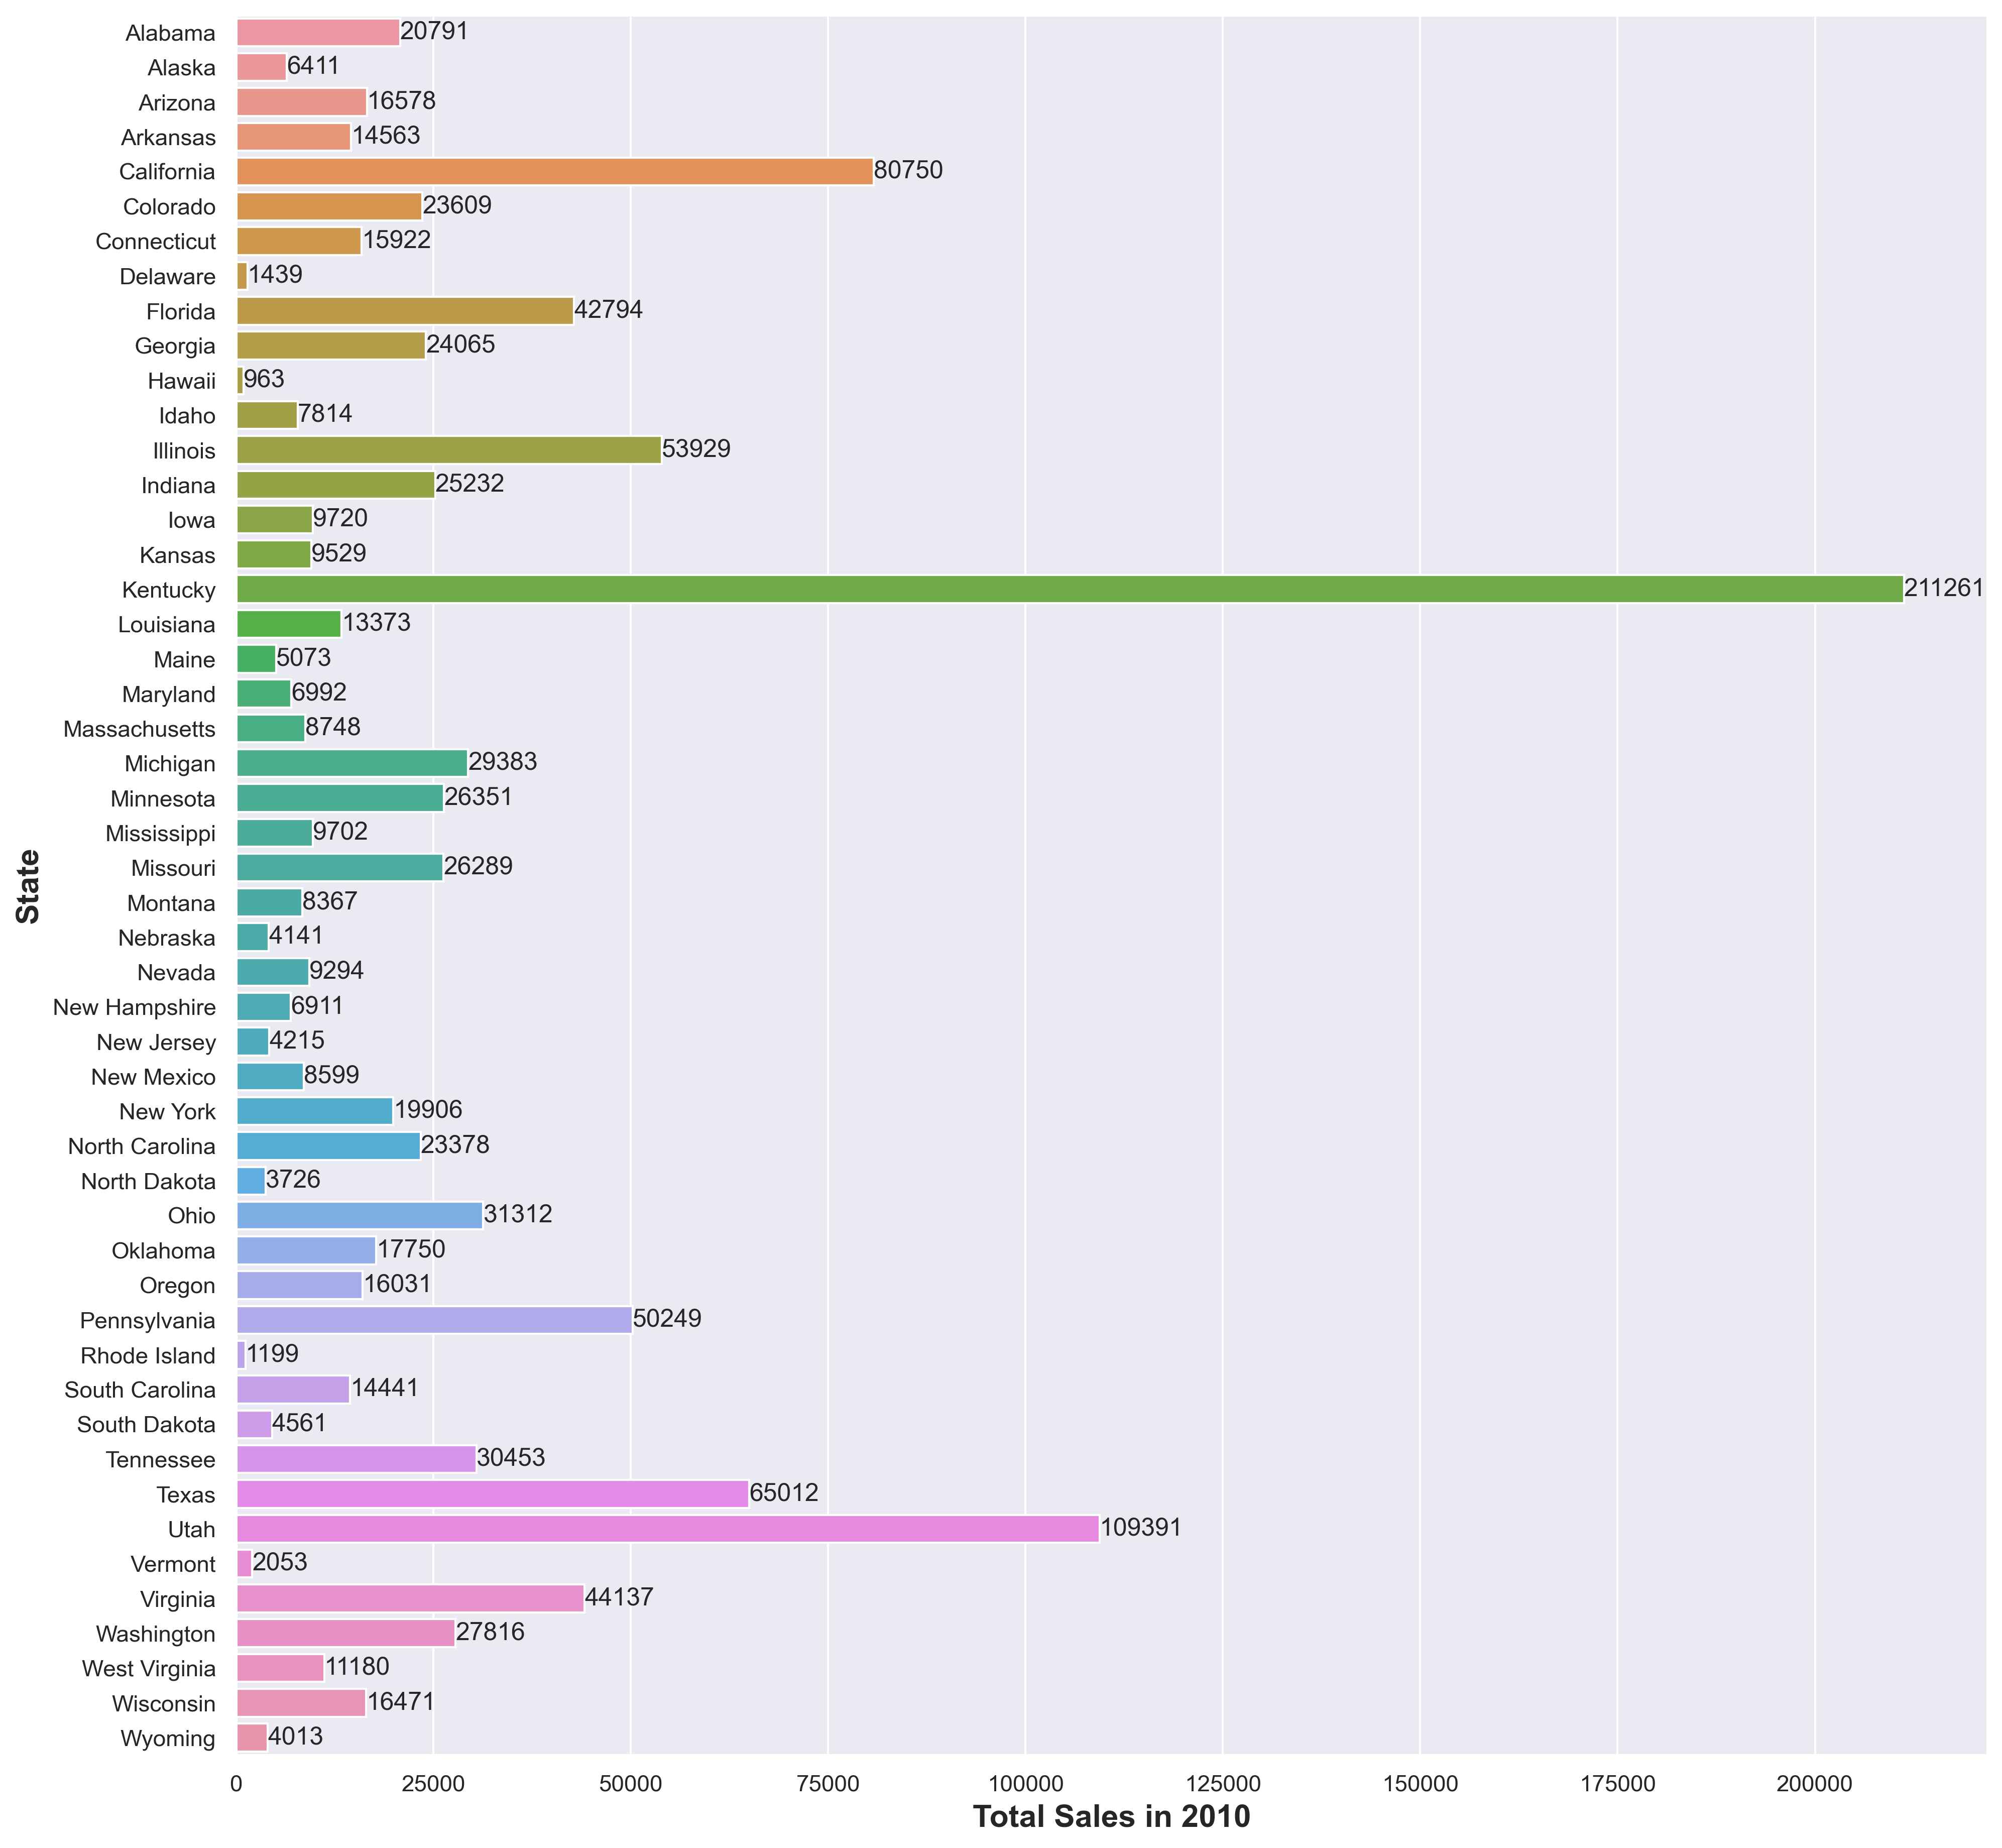

In [329]:
# Now let's plot 2010 Sales
sns_plotter([15,15], 300, final_1016.totals_10, final_1016.state,'h', 'Total Sales in 2010', 'State')

We can clearly see that Kentucky was the highest state with firearm sales in 2010. We can further confirm this using the `max()` function.

In [330]:
final_1016.iloc[final_1016['totals_10'].idxmax()][:1]

state    Kentucky
Name: 16, dtype: object

Let's see if Kentucky still surpasses other states in firearm sales six years later.

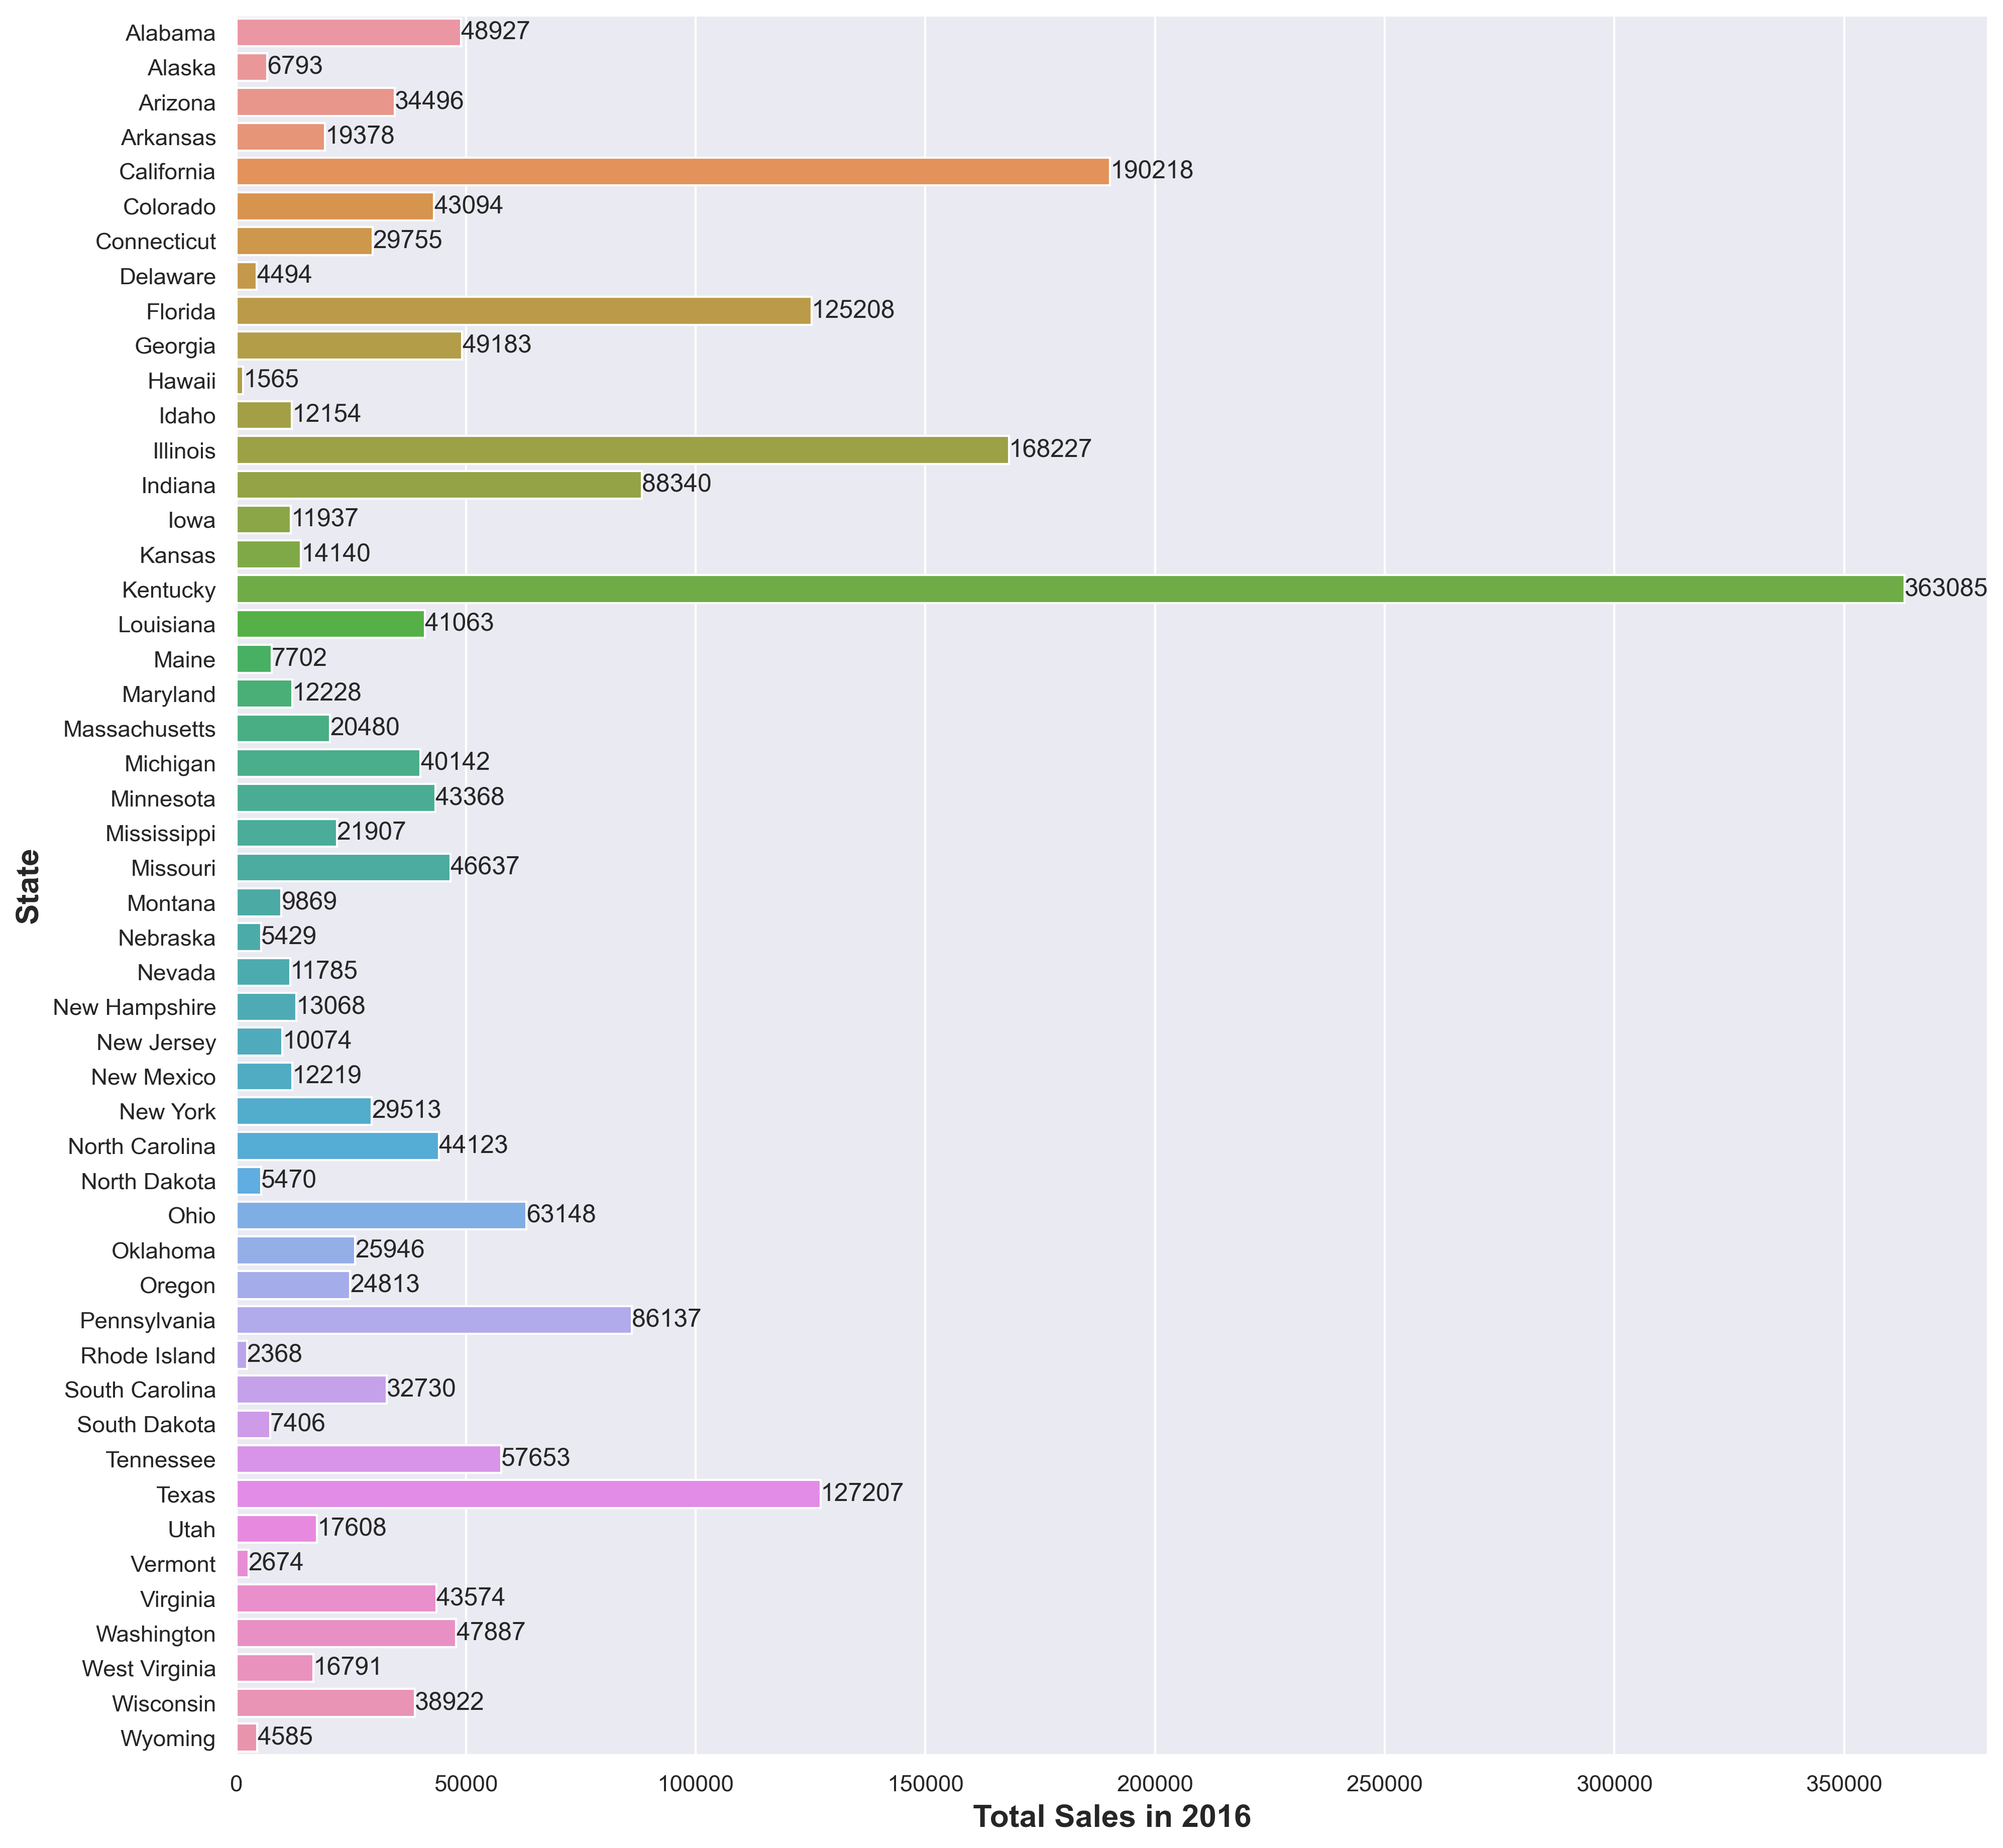

In [331]:
sns_plotter([15,15], 300, final_1016.totals_16, final_1016.state,'h', 'Total Sales in 2016', 'State')

Seems like Kentucky has the highest gun sales in both years.

In [332]:
# max() of 2016 totals
final_1016.iloc[final_1016['totals_16'].idxmax()][:1]

state    Kentucky
Name: 16, dtype: object

Let's chart the surge over six years' time.

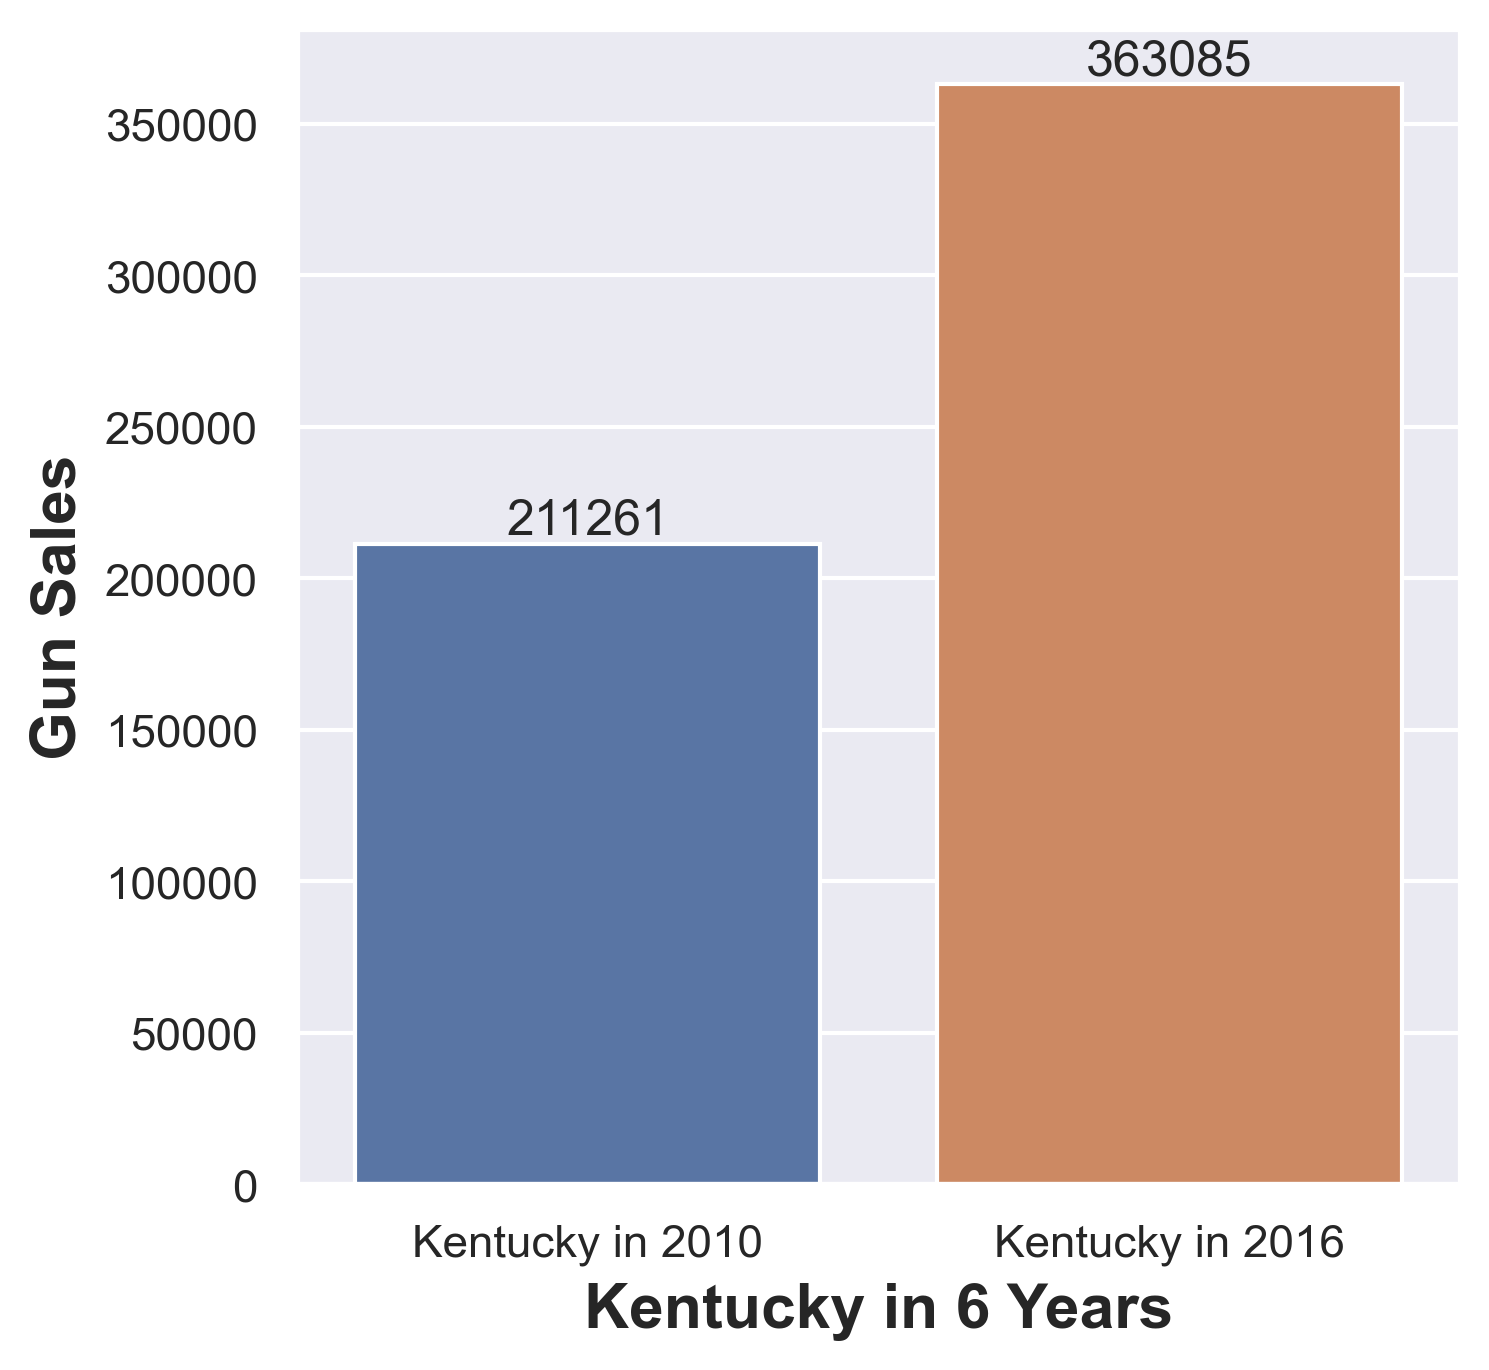

In [333]:
sns_plotter([5,5], 300, [bar_labels + " in 2010", bar_labels + " in 2016"], [kentucky_10, kentucky_16], 'v', 'Kentucky in 6 Years', 'Gun Sales')

<a id='q2'></a>
### What state saw a significant increase in gun sales six years later?
Now let's chart which state experienced the greatest increase in firearm purchases between 2010 and 2016.

In [334]:
difference_10_16 = final_1016['totals_16'] - final_1016['totals_10']

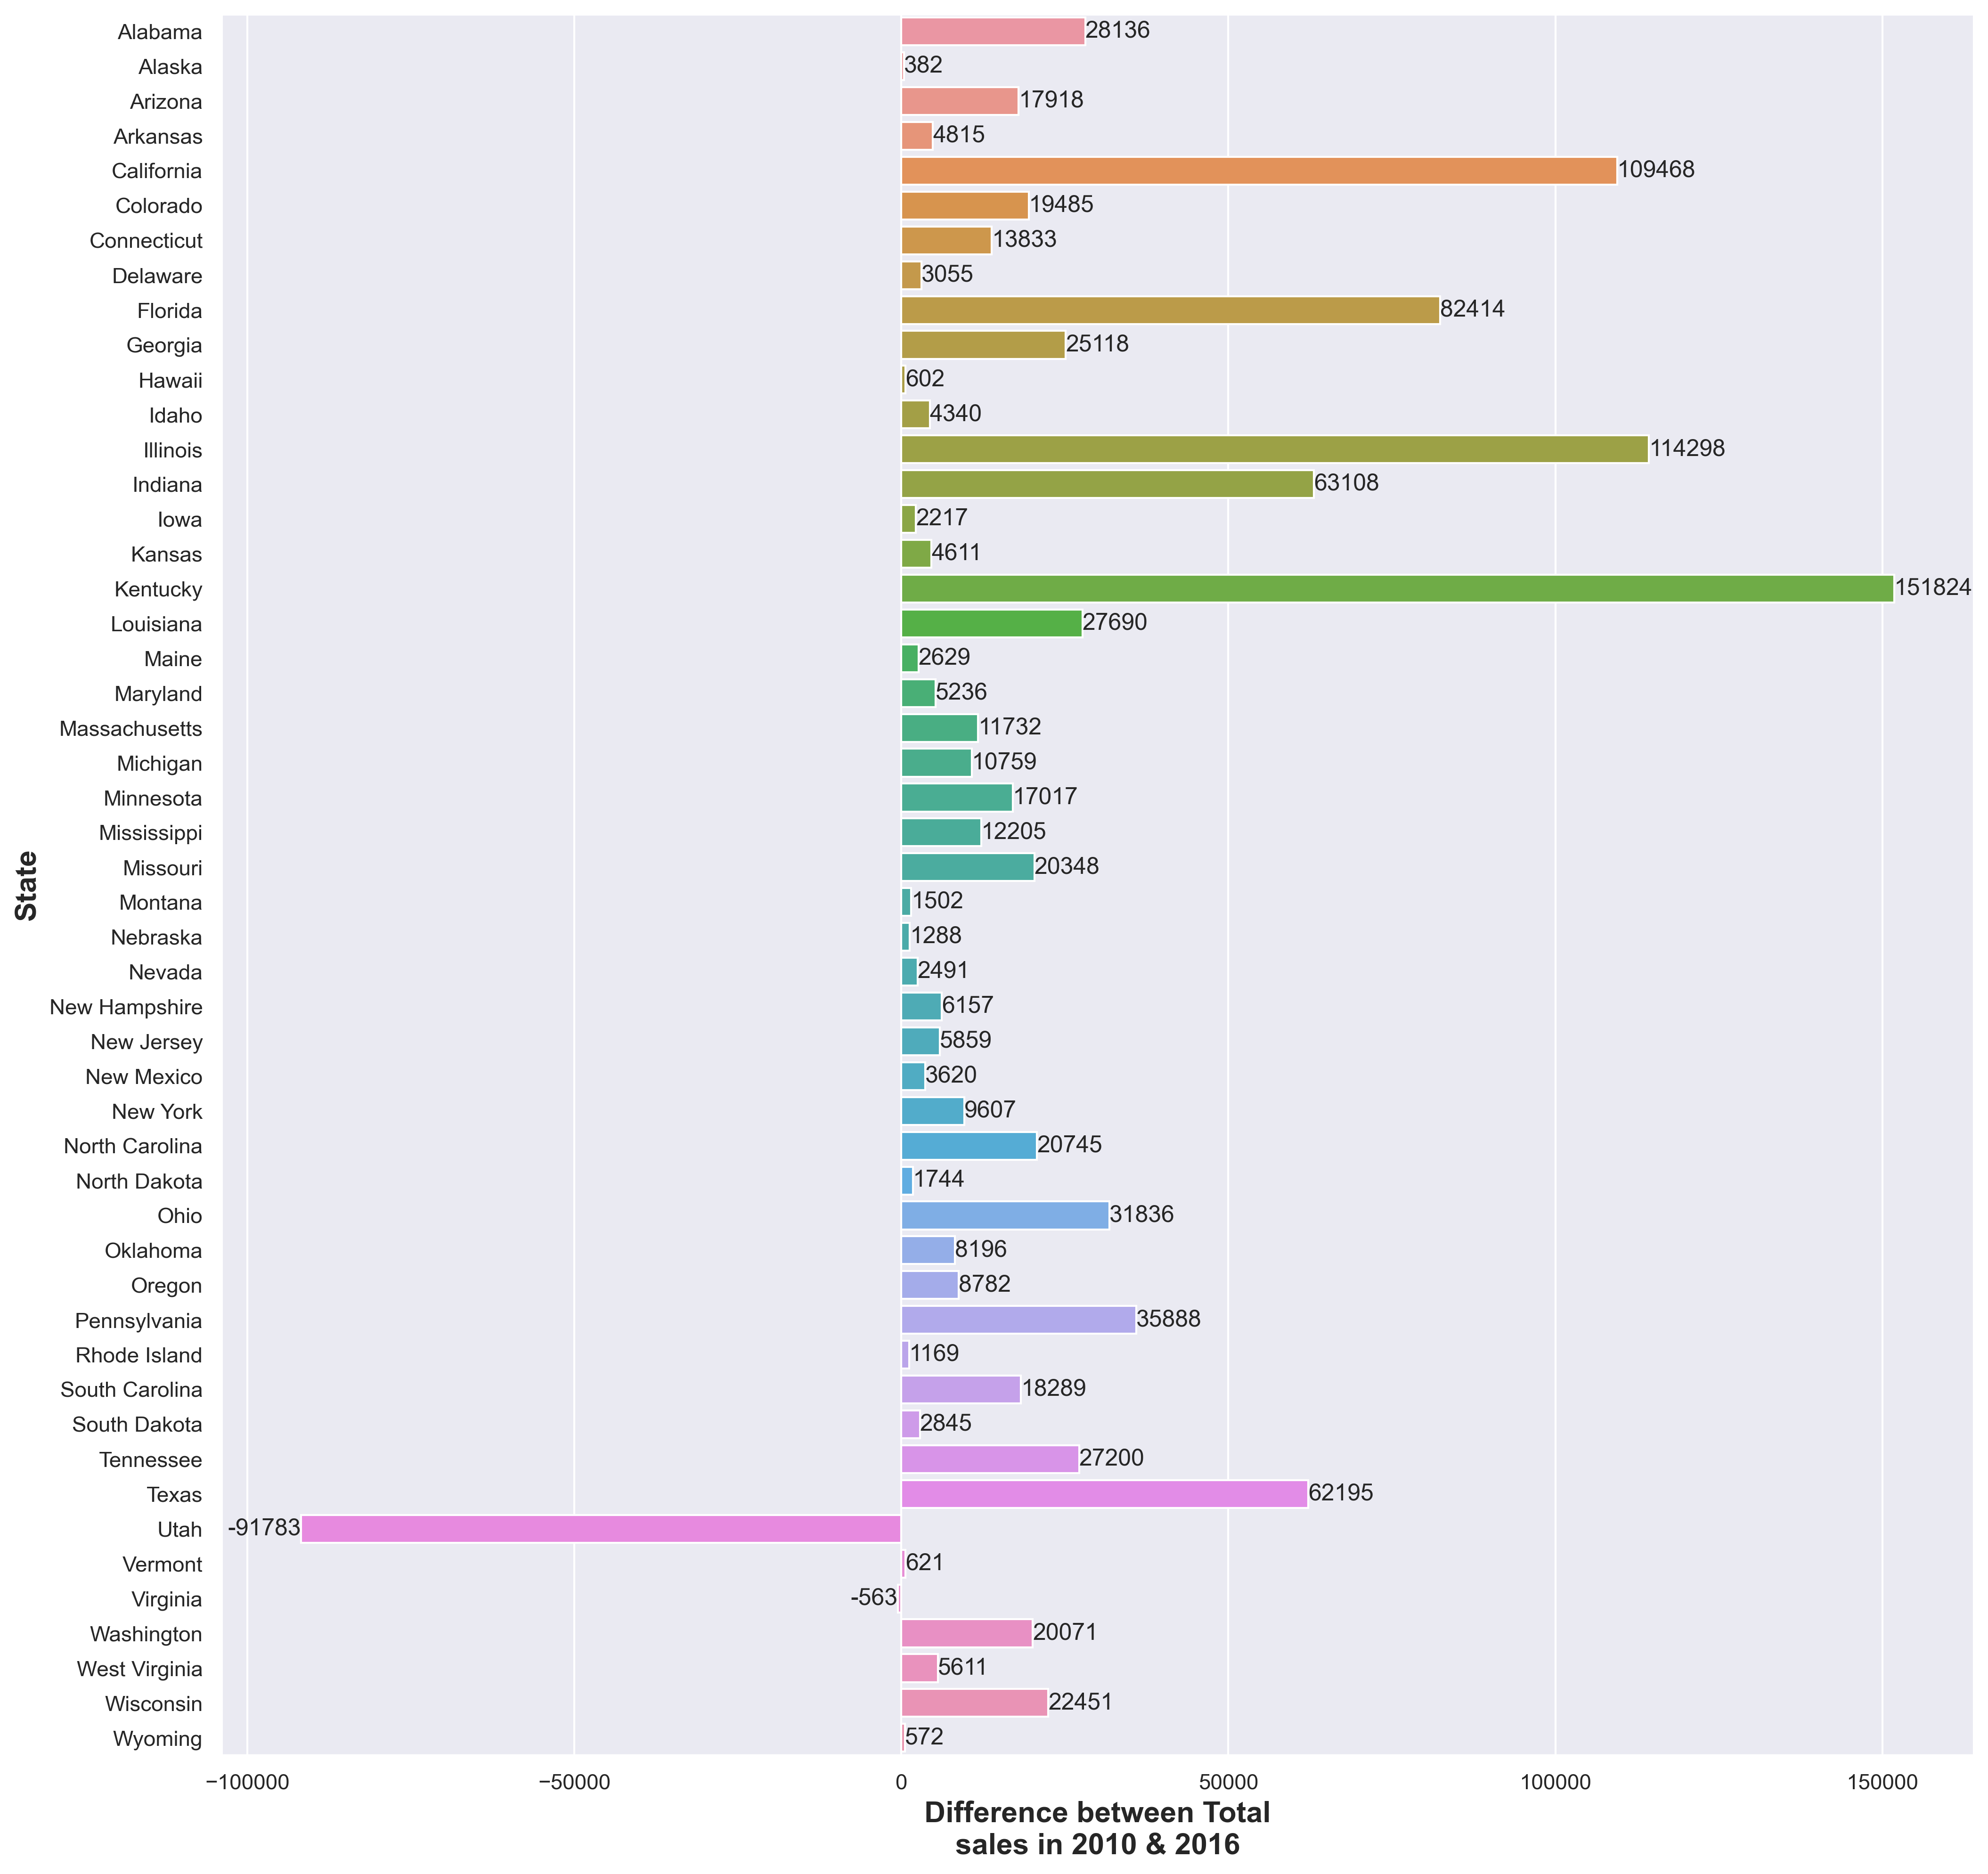

In [335]:
sns_plotter([16, 16], 300, difference_10_16, final_1016.state, 'h', 'Difference between Total\nsales in 2010 & 2016', 'State')

Clearly, Kentucky experienced the most significant increase over a period of six years. However, it is evident that some states experienced a decrease in firearm sales, especially **Utah**.

<a id='q3'></a>

### Are there disparities in firearm acquisitions among different racial groups?

Gun control is a highly contested issue in the US, and research suggests that race plays a major role in public opinion on the matter. White gun owners make up the majority of gun owners in the US, and polls show that they are more likely to oppose stricter gun control than other racial groups.[<sup>1</sup>](https://www.washingtonpost.com/news/monkey-cage/wp/2016/06/21/heres-the-surprising-reason-some-white-americans-oppose-gun-regulation/)

Let's try seeing if this is true for our data.

In [336]:
final_1016.head()

state  totals_16  totals_10  population_16  population_10  female_16  \
0     Alabama      48927      20791        4863300        4780131       51.6   
1      Alaska       6793       6411         741894         710249       47.7   
2     Arizona      34496      16578        6931071        6392301       50.3   
3    Arkansas      19378      14563        2988248        2916025       50.9   
4  California     190218      80750       39250017       37254522       50.3   

   male_16  female_10  male_10  white_16  black_african_american_16  \
0     48.4       51.5     48.5      69.3                       26.8   
1     52.3       48.0     52.0      66.1                        3.8   
2     49.7       50.3     49.7      83.3                        4.9   
3     49.1       50.9     49.1      79.4                       15.7   
4     49.7       50.3     49.7      72.7                        6.5   

   american_indian_alaska_native_16  asian_16  \
0                               0.7       1.4   
1                              15.2       6.3   
2                               5.4       3.4   
3                               1.0       1.6   
4                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  
0                 4.2     2230185     2171853  
1                 7.0      310658      306967  
2                30.9     2961003     2844526  
3                 7.3     1354762     1316299  
4                38.9    14060525    13680081

We had already determined that Kentucky had the highest number of gun purchases in 2016. To make a comparison, we can additionally find the lowest gun purchases from that same year and then assess the racial composition of each state.

In [337]:
# Getting the state names of the minimum & maximum.
label_highest_state_16 = final_1016.iloc[final_1016['totals_16'].idxmax()][0]
label_lowest_state_16 = final_1016.iloc[final_1016['totals_16'].idxmin()][0]

In [338]:
# Querying only Kentucky state
kentucky_race= final_1016.query("state == 'Kentucky'")

In [339]:
# Choosing only race columns
kentucky_race = kentucky_race.iloc[:,9:16]

In [340]:
kentucky_race.head()

white_16  black_african_american_16  american_indian_alaska_native_16  \
16      88.0                        8.3                               0.3   

    asian_16  native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
16       1.5                                        0.1                   1.9   

    hispanic_latino_16  
16                 3.5

In [341]:
# Getting the minimum sale's index
lowest_sales = final_1016['totals_16'].idxmin()
# Using the index to get the row
lowest_sales = final_1016.loc[lowest_sales]
# Choosing only race columns
lowest_sales = lowest_sales.iloc[9:16]
# Note that this is a series unlike kentucky_race
lowest_sales

white_16                                     25.8
black_african_american_16                     2.2
american_indian_alaska_native_16              0.4
asian_16                                     37.7
native_hawaiian_other_pacific_islander_16    10.2
two_or_more_races_16                         23.7
hispanic_latino_16                           10.4
Name: 10, dtype: object

In [342]:
type(lowest_sales)

pandas.core.series.Series

In [343]:
# Trimming _ & 16 from the column names to create a visually appealing label
race_labels = final_1016.columns[9:16]
race_labels = race_labels.to_list()
race_labels = [race.replace("_16","").replace("_", " ").title() for race in race_labels]
race_labels

['White',
 'Black African American',
 'American Indian Alaska Native',
 'Asian',
 'Native Hawaiian Other Pacific Islander',
 'Two Or More Races',
 'Hispanic Latino']

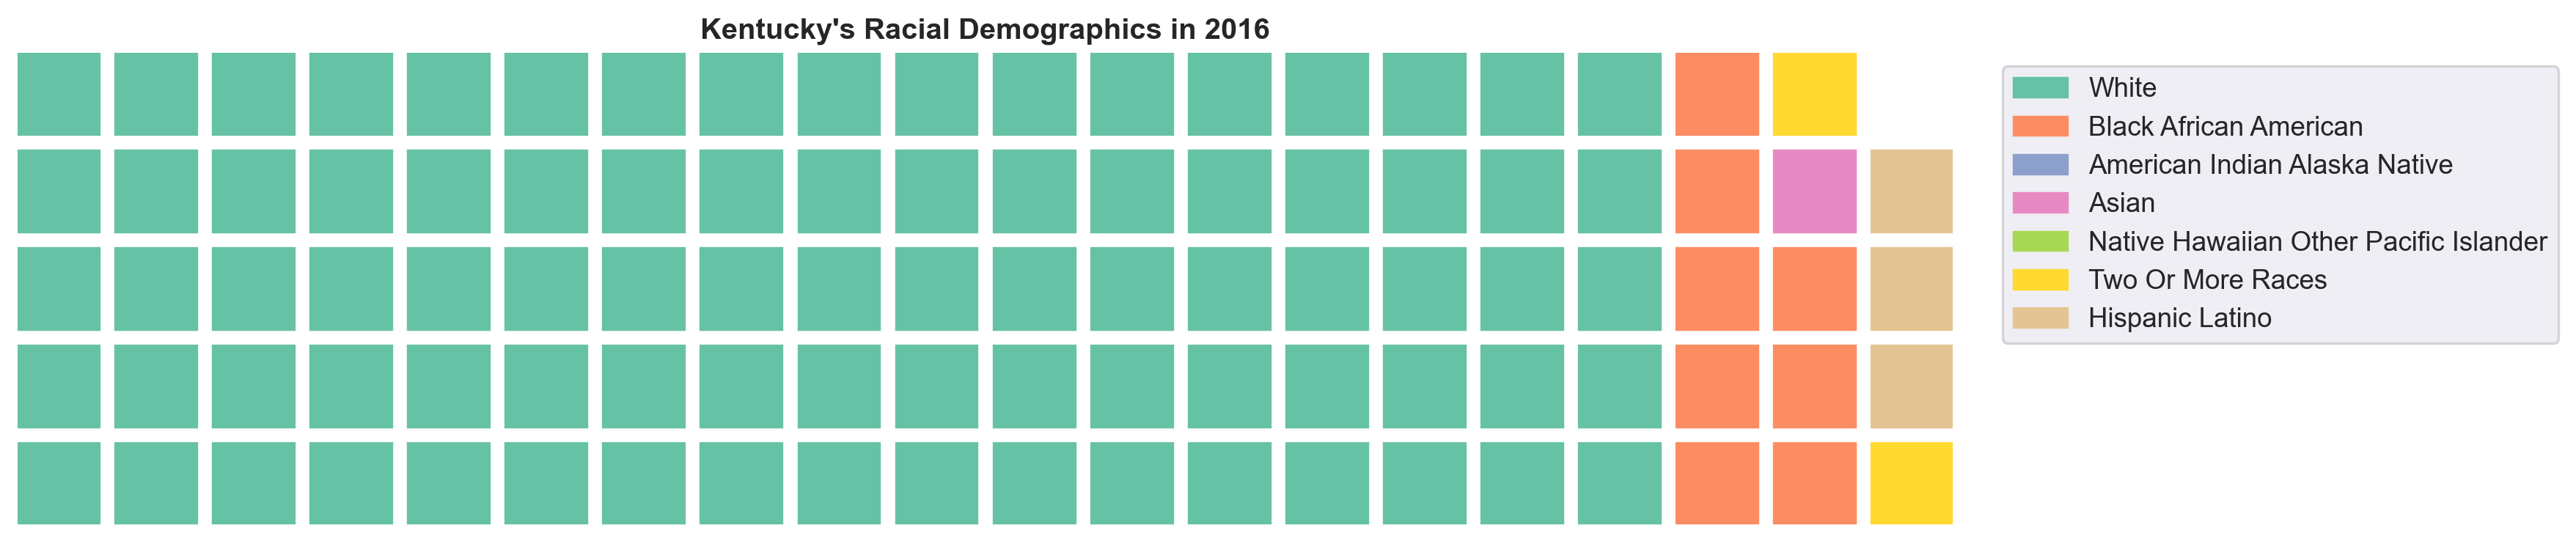

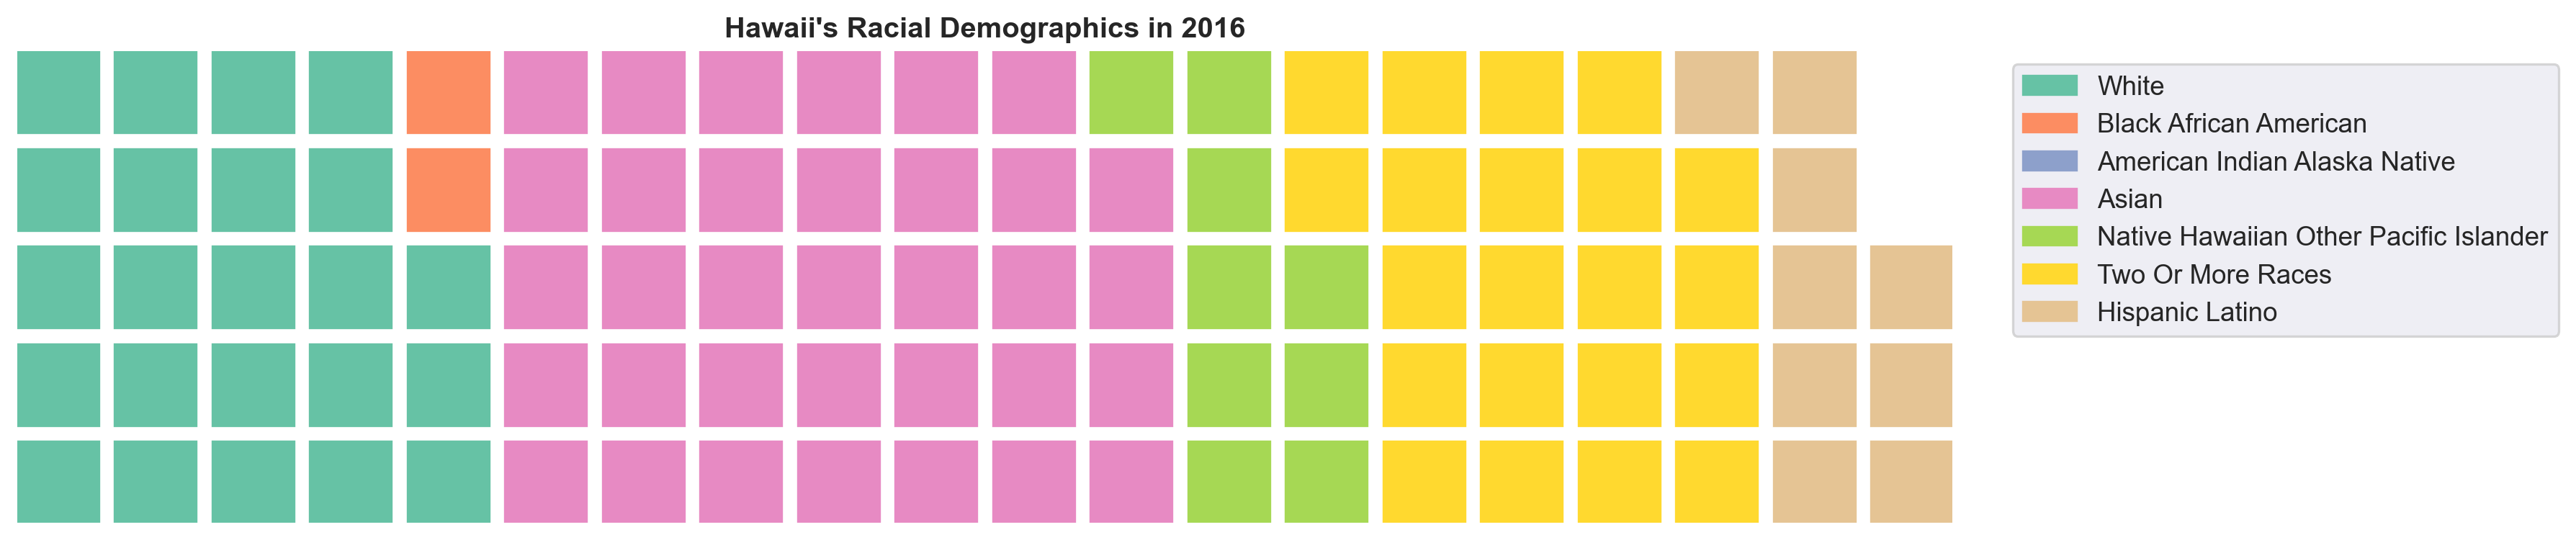

In [344]:
# Using PyWaffle to create a waffel chart (use pip install pywaffle to install if needed; if in Jupyter you'll need to add ! before pip)
from pywaffle import Waffle
kentucky_race_fig = plt.figure(FigureClass=Waffle,
                               values = kentucky_race.iloc[0],
                               rows=5, 
                               columns=20,
                               labels=race_labels,
                               figsize = (15,6),
                               legend={'loc':'upper right',
                                       'bbox_to_anchor': (1.32, 1),
                                      },
                               title={'label': 'Kentucky\'s Racial Demographics in 2016',
                                      'loc': 'center',
                                      'fontweight': 'bold'
                                     },
                               dpi = 240
                              )
lowest_race_sales=str(final_1016['state'].iloc[final_1016['totals_16'].idxmin()])
kentucky_race_fig = plt.figure(FigureClass=Waffle,
                               values = lowest_sales,
                               rows=5,
                               columns=20,
                               labels=race_labels,
                               figsize = (15,6),
                               legend={'loc':'upper right',
                                       'bbox_to_anchor': (1.32, 1),
                                      },
                               title={'label': lowest_race_sales + '\'s Racial Demographics in 2016',
                                      'loc': 'center',
                                      'fontweight': 'bold'
                                     },
                               dpi = 240
                              )
plt.tight_layout()
plt.show()

We can clearly observe that, in 2016, the state with the highest sales had a predominantly White population, whereas the state with the lowest sales, Hawaii, had a less White population. This is also true for the Black African American population. We can also see that Kentucky's Asian population was much smaller compared to Hawaii's. The same is true for the Hispanic/Latino and the multiracial (two or more races) population. It is worth mentioning that the Native Hawaiian and other Pacific Islander population is almost nonexistent in Kentucky. This is also true for the American Indian and Alaska Native population. Although inconclusive due to the [caveats](https://www.census.gov/quickfacts/fact/table/US/PST045222)  of the data gathering techniques, this shows that, to some extent, race plays a role in gun purchases.

<a id='q4'></a>

### Does gender play a role in gun purcahses?

Now let's explore whether gender has an influence on gun purchases in the states. We have data from 2016 and 2010, and we have already identified the regions with the highest and lowest sales for 2016. Let's now do the same for 2010.

In [345]:
# Querying only Kentucky state
highest_sales_gender_16= final_1016.query("state == 'Kentucky'")

In [346]:
# Displaying columns to select gender columns only
highest_sales_gender_16.columns

Index(['state', 'totals_16', 'totals_10', 'population_16', 'population_10',
       'female_16', 'male_16', 'female_10', 'male_10', 'white_16',
       'black_african_american_16', 'american_indian_alaska_native_16',
       'asian_16', 'native_hawaiian_other_pacific_islander_16',
       'two_or_more_races_16', 'hispanic_latino_16', 'housing_16',
       'housing_10'],
      dtype='object')

In [347]:
# Copying only gender 
highest_sales_gender_16= highest_sales_gender_16[[
    'state',
    'female_16',
    'male_16'
]].copy()

In [348]:
highest_sales_gender_16

state  female_16  male_16
16  Kentucky       50.7     49.3

In [349]:
# Getting the minimum sales state for 2016
lowest_sales_gender_16 = final_1016['totals_16'].min()
lowest_sales_gender_16

1565

In [350]:
lowest_sales_gender_16 = final_1016.query("totals_16 == 1565")
lowest_sales_gender_16

state  totals_16  totals_10  population_16  population_10  female_16  \
10  Hawaii       1565        963        1428557        1360301       49.8   

    male_16  female_10  male_10  white_16  black_african_american_16  \
10     50.2       49.9     50.1      25.8                        2.2   

    american_indian_alaska_native_16  asian_16  \
10                               0.4      37.7   

    native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
10                                       10.2                  23.7   

    hispanic_latino_16  housing_16  housing_10  
10                10.4      537114      519508

In [351]:
# Copying only gender columns
lowest_sales_gender_16= lowest_sales_gender_16[[
    'state',
    'female_16',
    'male_16'
]].copy()

In [352]:
lowest_sales_gender_16

state  female_16  male_16
10  Hawaii       49.8     50.2

Let's do the same for 2010's columns.

In [353]:
# Getting the maximum sales state for 2010
highest_sales_gender_10 = final_1016['totals_10'].max()
highest_sales_gender_10

211261

In [354]:
# Using the maximum to Query the entire row
highest_sales_gender_10 = final_1016.query("totals_10 == 211261")
highest_sales_gender_10

state  totals_16  totals_10  population_16  population_10  female_16  \
16  Kentucky     363085     211261        4436974        4339344       50.7   

    male_16  female_10  male_10  white_16  black_african_american_16  \
16     49.3       50.8     49.2      88.0                        8.3   

    american_indian_alaska_native_16  asian_16  \
16                               0.3       1.5   

    native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
16                                        0.1                   1.9   

    hispanic_latino_16  housing_16  housing_10  
16                 3.5     1965556     1927164

In [355]:
highest_sales_gender_10= highest_sales_gender_10[[
    'state',
    'female_10',
    'male_10'
]].copy()

In [356]:
highest_sales_gender_10.head()

state  female_10  male_10
16  Kentucky       50.8     49.2

In [357]:
# Getting the minimum sales state for 2010
lowest_sales_gender_10 = final_1016['totals_10'].min()
lowest_sales_gender_10

963

In [358]:
# Using the minimum to Query the entire row
lowest_sales_gender_10 = final_1016.query("totals_10 == 963")
lowest_sales_gender_10

state  totals_16  totals_10  population_16  population_10  female_16  \
10  Hawaii       1565        963        1428557        1360301       49.8   

    male_16  female_10  male_10  white_16  black_african_american_16  \
10     50.2       49.9     50.1      25.8                        2.2   

    american_indian_alaska_native_16  asian_16  \
10                               0.4      37.7   

    native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
10                                       10.2                  23.7   

    hispanic_latino_16  housing_16  housing_10  
10                10.4      537114      519508

In [359]:
lowest_sales_gender_10= lowest_sales_gender_10[[
    'state',
    'female_10',
    'male_10'
]].copy()

In [360]:
lowest_sales_gender_10

state  female_10  male_10
10  Hawaii       49.9     50.1

Now let's use a pie chart to represent our results.

In [361]:
# Creating clean labels for gender
gender_labels = lowest_sales_gender_10.columns[1:]
gender_labels = gender_labels.to_list()
gender_labels = [gender.replace("_10","").title() for gender in gender_labels]
gender_labels

['Female', 'Male']

In [362]:
# Setting pie's style      
font_color = 'black'
colors = ['lightblue', 'lightgreen']

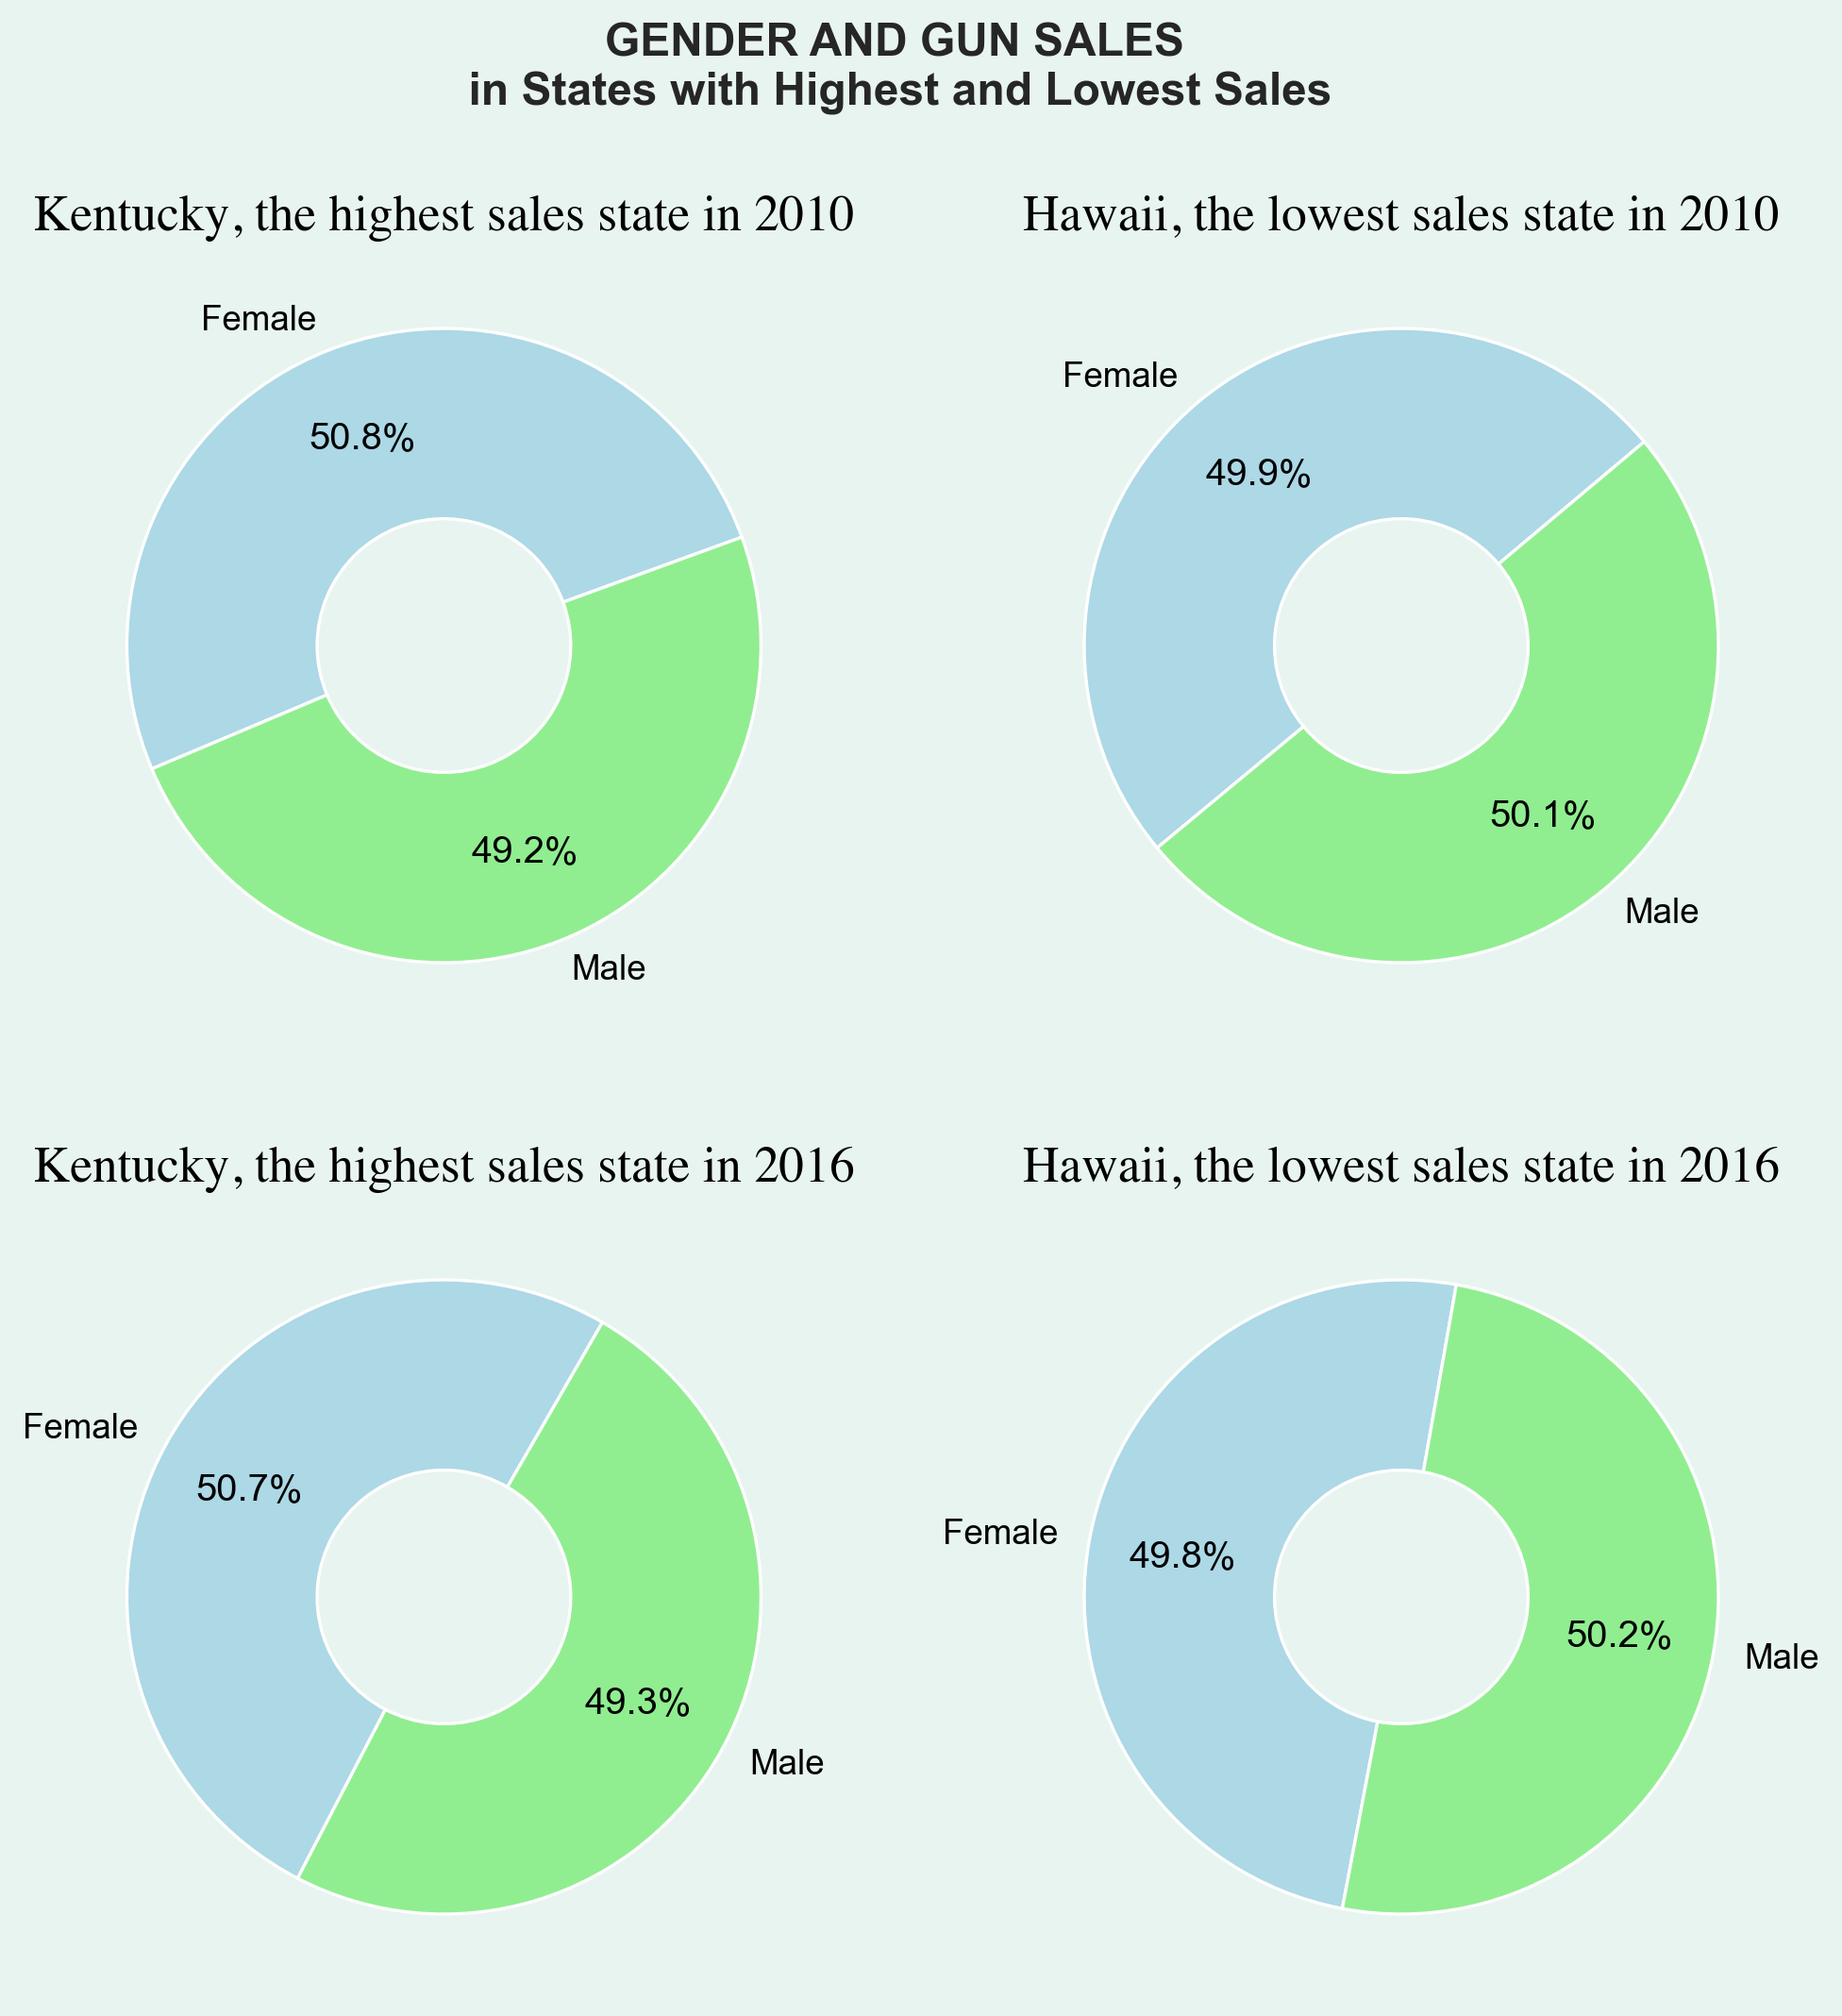

In [363]:
# Setting figure size and axis
fig, axs= plt.subplots(2, 2, figsize=(10, 10), facecolor='#e8f4f0', dpi=240)
fig.suptitle('GENDER AND GUN SALES\n in States with Highest and Lowest Sales', weight='bold')
# Setting highest sales state in 2010 gender figure
axs[0, 0].pie(
    highest_sales_gender_10.iloc[0, 1:], 
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=20, 
    wedgeprops=dict(width=0.6),
    colors=colors, 
    textprops=
    {
        'color':'black',
    },
    pctdistance=0.7
)

# Setting subfigure's title
axs[0,0].set_title(
    highest_sales_gender_10.state.iloc[0] + ", the highest sales state in 2010",
    fontsize=16,
    color='black',
    fontname='Times',
    fontweight='bold',
    style='italic'
);

# Setting lowest sales state in 2010 gender figure
axs[0, 1].pie(
    lowest_sales_gender_10.iloc[0, 1:], 
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=40, 
    wedgeprops=dict(width=0.6),
    colors=colors, 
    textprops=
    {
        'color':'black',
    },
    pctdistance=0.7
)

# Setting subfigure's title
axs[0,1].set_title(
    lowest_sales_gender_10.state.iloc[0] + ", the lowest sales state in 2010",
    fontsize=16,
    color='black',
    fontname='Times',
    fontweight='bold',
    style='italic'
);

# Setting highest sales state in 2016 gender figure
axs[1, 0].pie(
    highest_sales_gender_16.iloc[0, 1:], 
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=60, 
    wedgeprops=dict(width=0.6), 
    colors=colors, 
    textprops=
    {
        'color':'black',
    },
    pctdistance=0.7
)
# Setting subfigure's title
axs[1,0].set_title(
    highest_sales_gender_16.state.iloc[0] + ", the highest sales state in 2016",
    fontsize=16,
    color='black',
    fontname='Times',
    fontweight='bold',
    style='italic'
)

# Setting lowest sales state in 2016 gender figure
axs[1, 1].pie(
    lowest_sales_gender_16.iloc[0, 1:], 
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=80, 
    wedgeprops=dict(width=0.6), 
    colors=colors, 
    textprops=
    {
        'color':'black',
    },
    pctdistance=0.7
)
# Setting subfigure's title
axs[1,1].set_title(
    lowest_sales_gender_16.state.iloc[0] + ", the lowest sales state in 2016",
    fontsize=16,
    color='black',
    fontname='Times',
    fontweight='bold',
    style='italic'
);


The figures suggest that the female population is more likely to purchase arms than their male counterparts. This is evident when comparing states with the highest and lowest sales between 2010 and 2016. The data shows that in the state with the highest gun sales, the female population was more likely to purchase arms than the male population. This trend was also observed in states with the lowest gun sales, indicating that female gun buyers outnumber male gun buyers. 

<a id='q5'></a>

### Is the veteran population pertinent to a state's firearm acquisitions?

Let's investigate whether gun sales are influenced by the veteran population.

In [364]:
final_1115.head()

state   totals  veterans_11_15  house_median_value_11_15  \
0     Alabama  1952643          363170                    125500   
1      Alaska   336568           69323                    250000   
2     Arizona  1264848          505794                    167500   
3    Arkansas   966439          220953                    111400   
4  California  4881215         1777410                    385500   

   households_11_15  high_school_11_15  bachelor_11_15  
0           1848325               84.3            23.5  
1            250969               92.1            28.0  
2           2412212               86.0            27.5  
3           1138025               84.8            21.1  
4          12717801               81.8            31.4

In [365]:
final_1115.columns

Index(['state', 'totals', 'veterans_11_15', 'house_median_value_11_15',
       'households_11_15', 'high_school_11_15', 'bachelor_11_15'],
      dtype='object')

In [366]:
# Copying the columns we need into a new DataFrame
veteran_sales = final_1115[[
    'state',
    'totals',
    'veterans_11_15'
]].copy()

In [367]:
veteran_sales.head()

state   totals  veterans_11_15
0     Alabama  1952643          363170
1      Alaska   336568           69323
2     Arizona  1264848          505794
3    Arkansas   966439          220953
4  California  4881215         1777410

In [368]:
# Let's create a scatter plot function
def scatter_plot(fig_size, _dpi, _ylabel, _xlabel, _title, x, y):
    plt.figure(figsize=(fig_size[0], fig_size[1]), dpi=_dpi)
    plt.ylabel(_ylabel)
    plt.xlabel(_xlabel)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.title(_title, weight='bold')
    plt.scatter(x, y)
    plt.show()

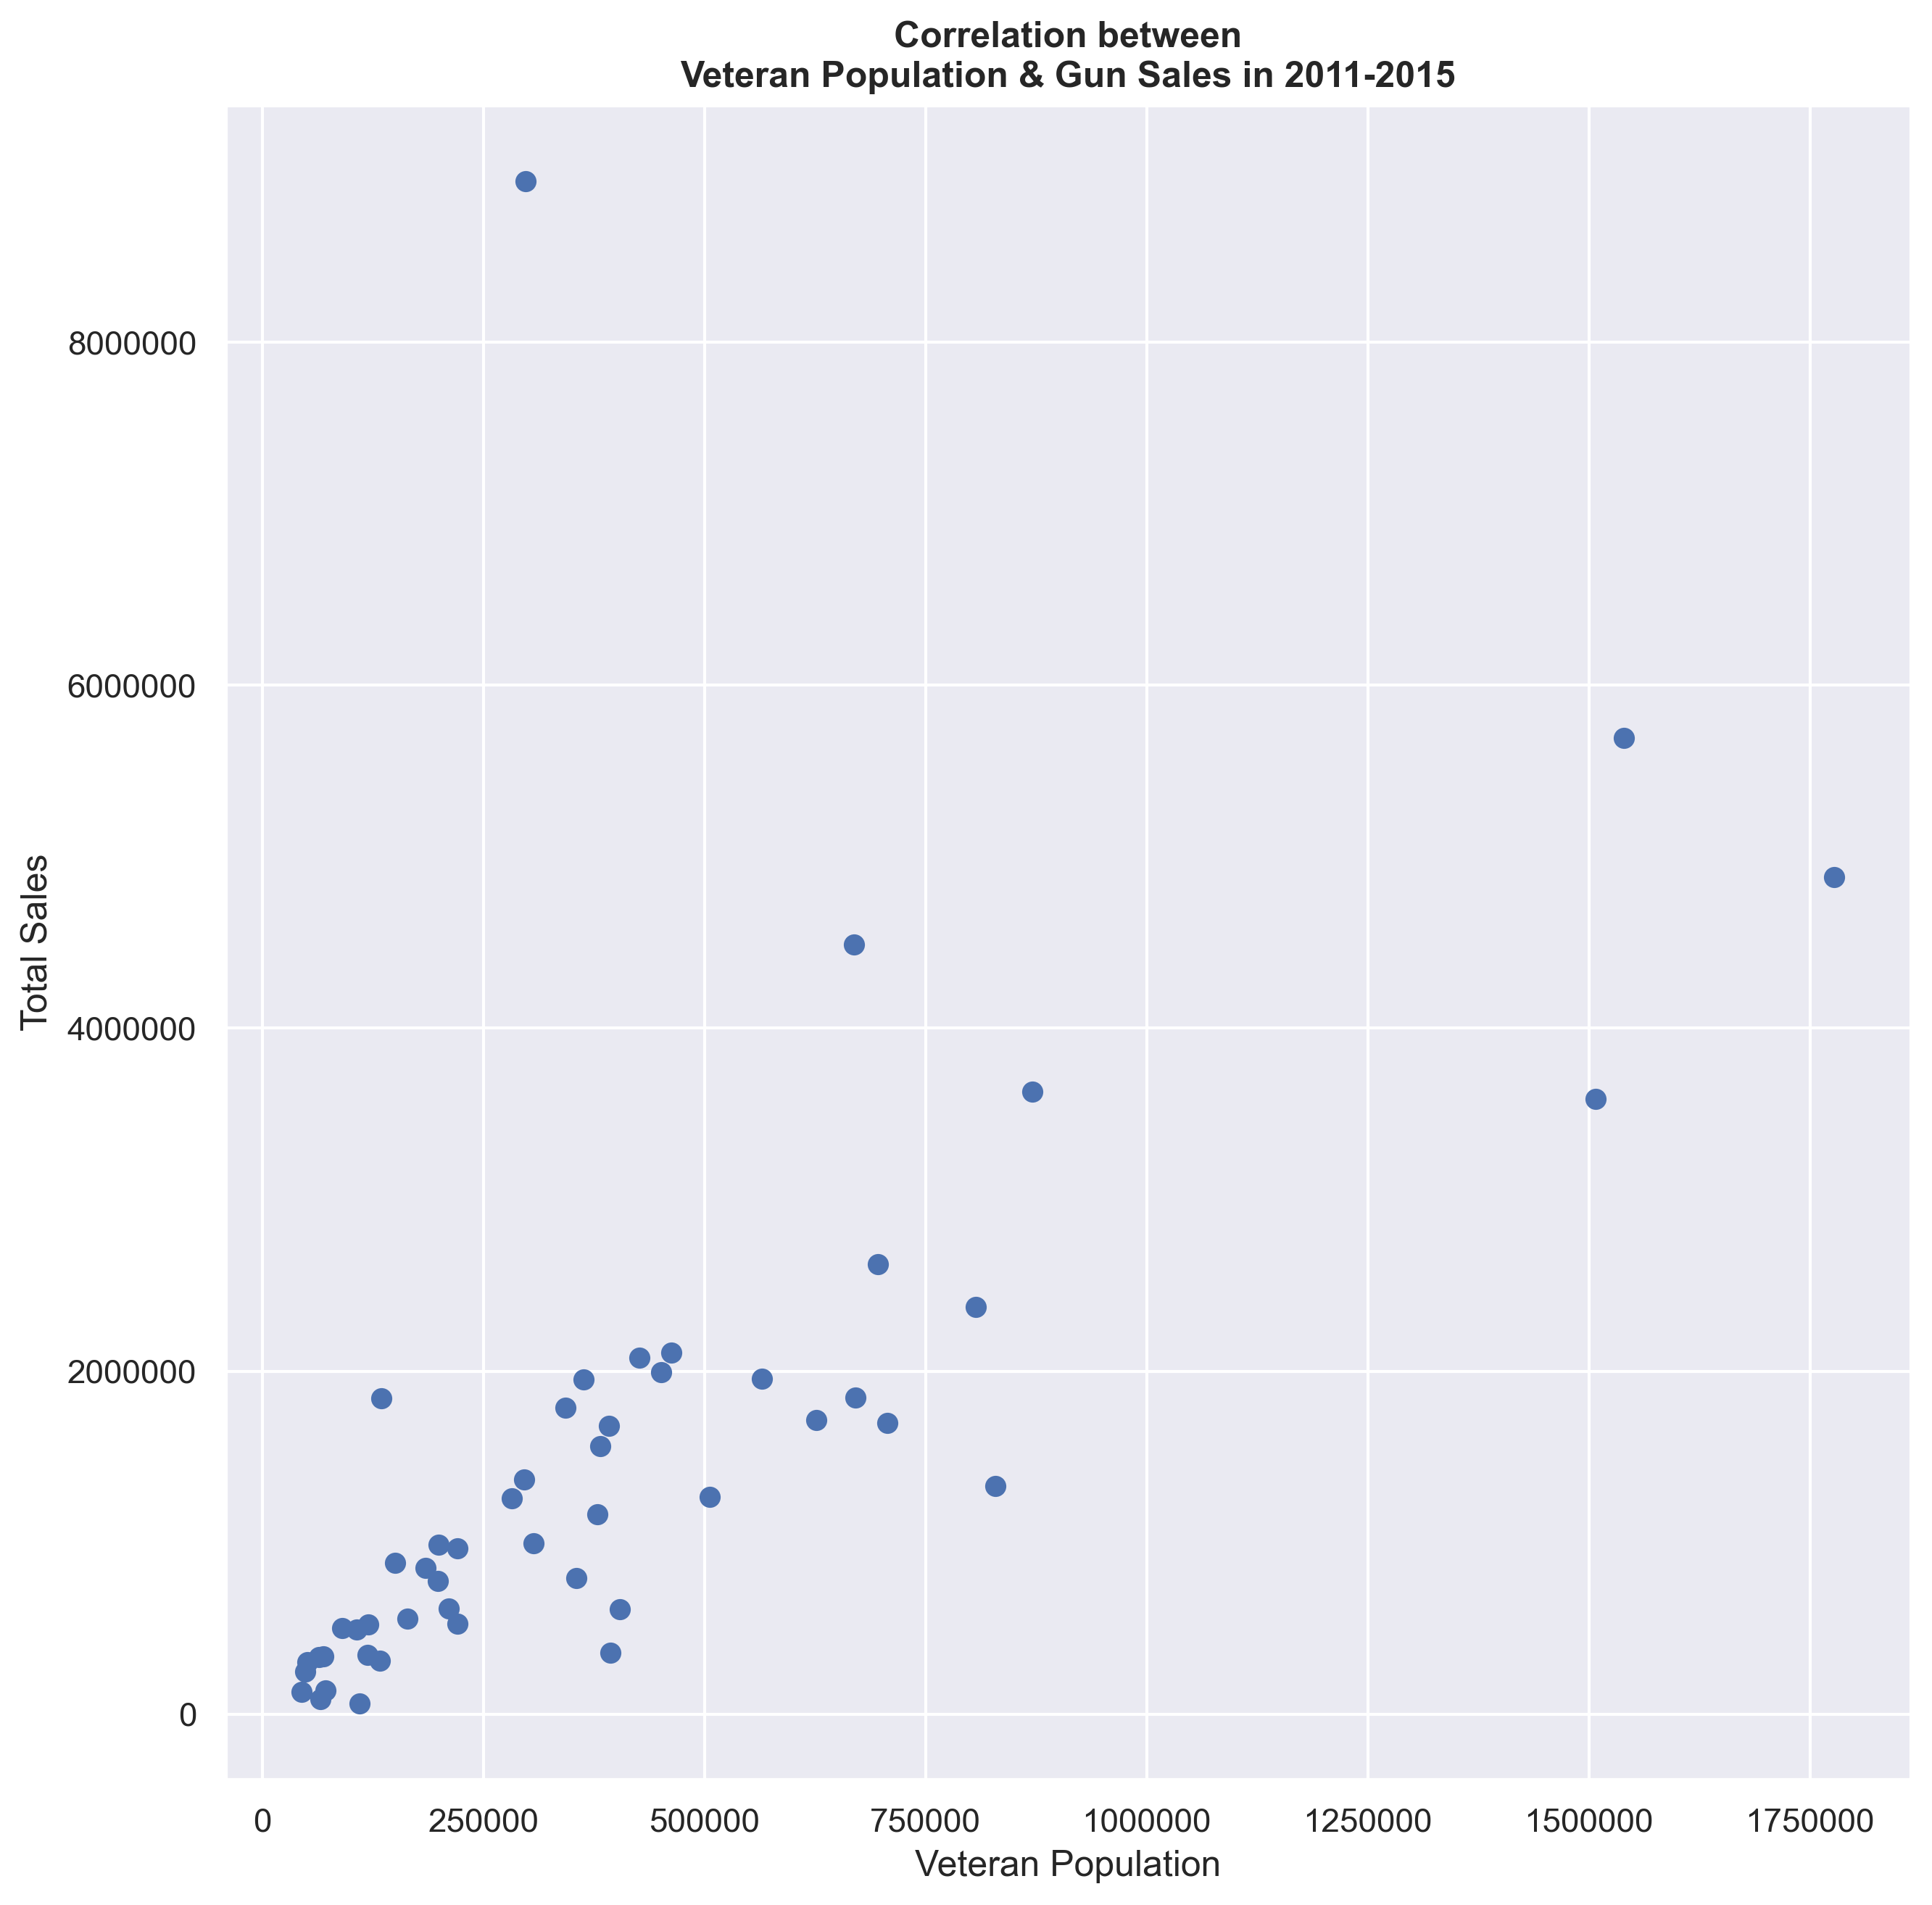

In [369]:
scatter_plot([10,10], 300, 
             'Total Sales', 
             'Veteran Population', 
             'Correlation between\nVeteran Population & Gun Sales in 2011-2015',
             veteran_sales['veterans_11_15'],
             veteran_sales['totals'])

We can observe a positive correlation between the veteran population and gun sales, which can be confirmed using `np.corrcoef()`.

In [370]:
np.corrcoef(x, y)[0,1]

0.5231000719677752

<a id='q6'></a>

### Is there a correlation between states with a greater disparity between the number of housing units and population and levels of gun sales?

Let's see if the disparity between housing units and population can affect gun purchases.

In [371]:
final_1016.head()

state  totals_16  totals_10  population_16  population_10  female_16  \
0     Alabama      48927      20791        4863300        4780131       51.6   
1      Alaska       6793       6411         741894         710249       47.7   
2     Arizona      34496      16578        6931071        6392301       50.3   
3    Arkansas      19378      14563        2988248        2916025       50.9   
4  California     190218      80750       39250017       37254522       50.3   

   male_16  female_10  male_10  white_16  black_african_american_16  \
0     48.4       51.5     48.5      69.3                       26.8   
1     52.3       48.0     52.0      66.1                        3.8   
2     49.7       50.3     49.7      83.3                        4.9   
3     49.1       50.9     49.1      79.4                       15.7   
4     49.7       50.3     49.7      72.7                        6.5   

   american_indian_alaska_native_16  asian_16  \
0                               0.7       1.4   
1                              15.2       6.3   
2                               5.4       3.4   
3                               1.0       1.6   
4                               1.7      14.8   

   native_hawaiian_other_pacific_islander_16  two_or_more_races_16  \
0                                        0.1                   1.6   
1                                        1.3                   7.3   
2                                        0.3                   2.8   
3                                        0.3                   2.0   
4                                        0.5                   3.8   

   hispanic_latino_16  housing_16  housing_10  
0                 4.2     2230185     2171853  
1                 7.0      310658      306967  
2                30.9     2961003     2844526  
3                 7.3     1354762     1316299  
4                38.9    14060525    13680081

In [372]:
final_1016.columns

Index(['state', 'totals_16', 'totals_10', 'population_16', 'population_10',
       'female_16', 'male_16', 'female_10', 'male_10', 'white_16',
       'black_african_american_16', 'american_indian_alaska_native_16',
       'asian_16', 'native_hawaiian_other_pacific_islander_16',
       'two_or_more_races_16', 'hispanic_latino_16', 'housing_16',
       'housing_10'],
      dtype='object')

In [373]:
# Copying columns we need
housing_unit = final_1016[[
    'state',
    'totals_16',
    'totals_10',
    'population_16',
    'population_10',
    'housing_16',
    'housing_10'
]].copy()

In [374]:
housing_unit.head()

state  totals_16  totals_10  population_16  population_10  housing_16  \
0     Alabama      48927      20791        4863300        4780131     2230185   
1      Alaska       6793       6411         741894         710249      310658   
2     Arizona      34496      16578        6931071        6392301     2961003   
3    Arkansas      19378      14563        2988248        2916025     1354762   
4  California     190218      80750       39250017       37254522    14060525   

   housing_10  
0     2171853  
1      306967  
2     2844526  
3     1316299  
4    13680081

In [375]:
# Calculating the difference in 2016 states
difference_population_housing_16 =housing_unit['population_16'] - housing_unit['housing_16']
difference_population_housing_16

0      2633115
1       431236
2      3970068
3      1633486
4     25189492
5      3201427
6      2077336
7       525916
8     11310797
9      6091595
10      891443
11      982315
12     7474569
13     3778507
14     1754531
15     1647425
16     2471418
17     2644691
18      600774
19     3569320
20     3953753
21     5368245
22     3110017
23     1681285
24     3332916
25      544764
26     1079960
27     1718360
28      709488
29     5340060
30     1163447
31    11513602
32     5606290
33      389328
34     6450012
35     2202516
36     2360679
37     7172225
38      593837
39     2724966
40      481616
41     3731523
42    17108967
43     1997053
44      295069
45     4920754
46     4262315
47      944462
48     3110264
49      314901
dtype: int64

In [376]:
# Calculating the difference in 2010 states
difference_population_housing_10 =housing_unit['population_10'] - housing_unit['housing_10']
difference_population_housing_10

0      2608278
1       403282
2      3547775
3      1599726
4     23574441
5      2816426
6      2086223
7       492051
8      9815012
9      5599879
10      840793
11      899854
12     7534859
13     3688595
14     1710452
15     1619914
16     2412180
17     2568498
18      606534
19     3394972
20     3739559
21     5351896
22     2956723
23     1693384
24     3276199
25      506589
26     1029541
27     1526877
28      701707
29     5238391
30     1157810
31    11270007
32     5208160
33      355093
34     6409219
35     2087237
36     2155510
37     7135542
38      589552
39     2487727
40      450757
41     3534165
42    15168664
43     1784179
44      303202
45     4636102
46     3838868
47      971094
48     3062931
49      301899
dtype: int64

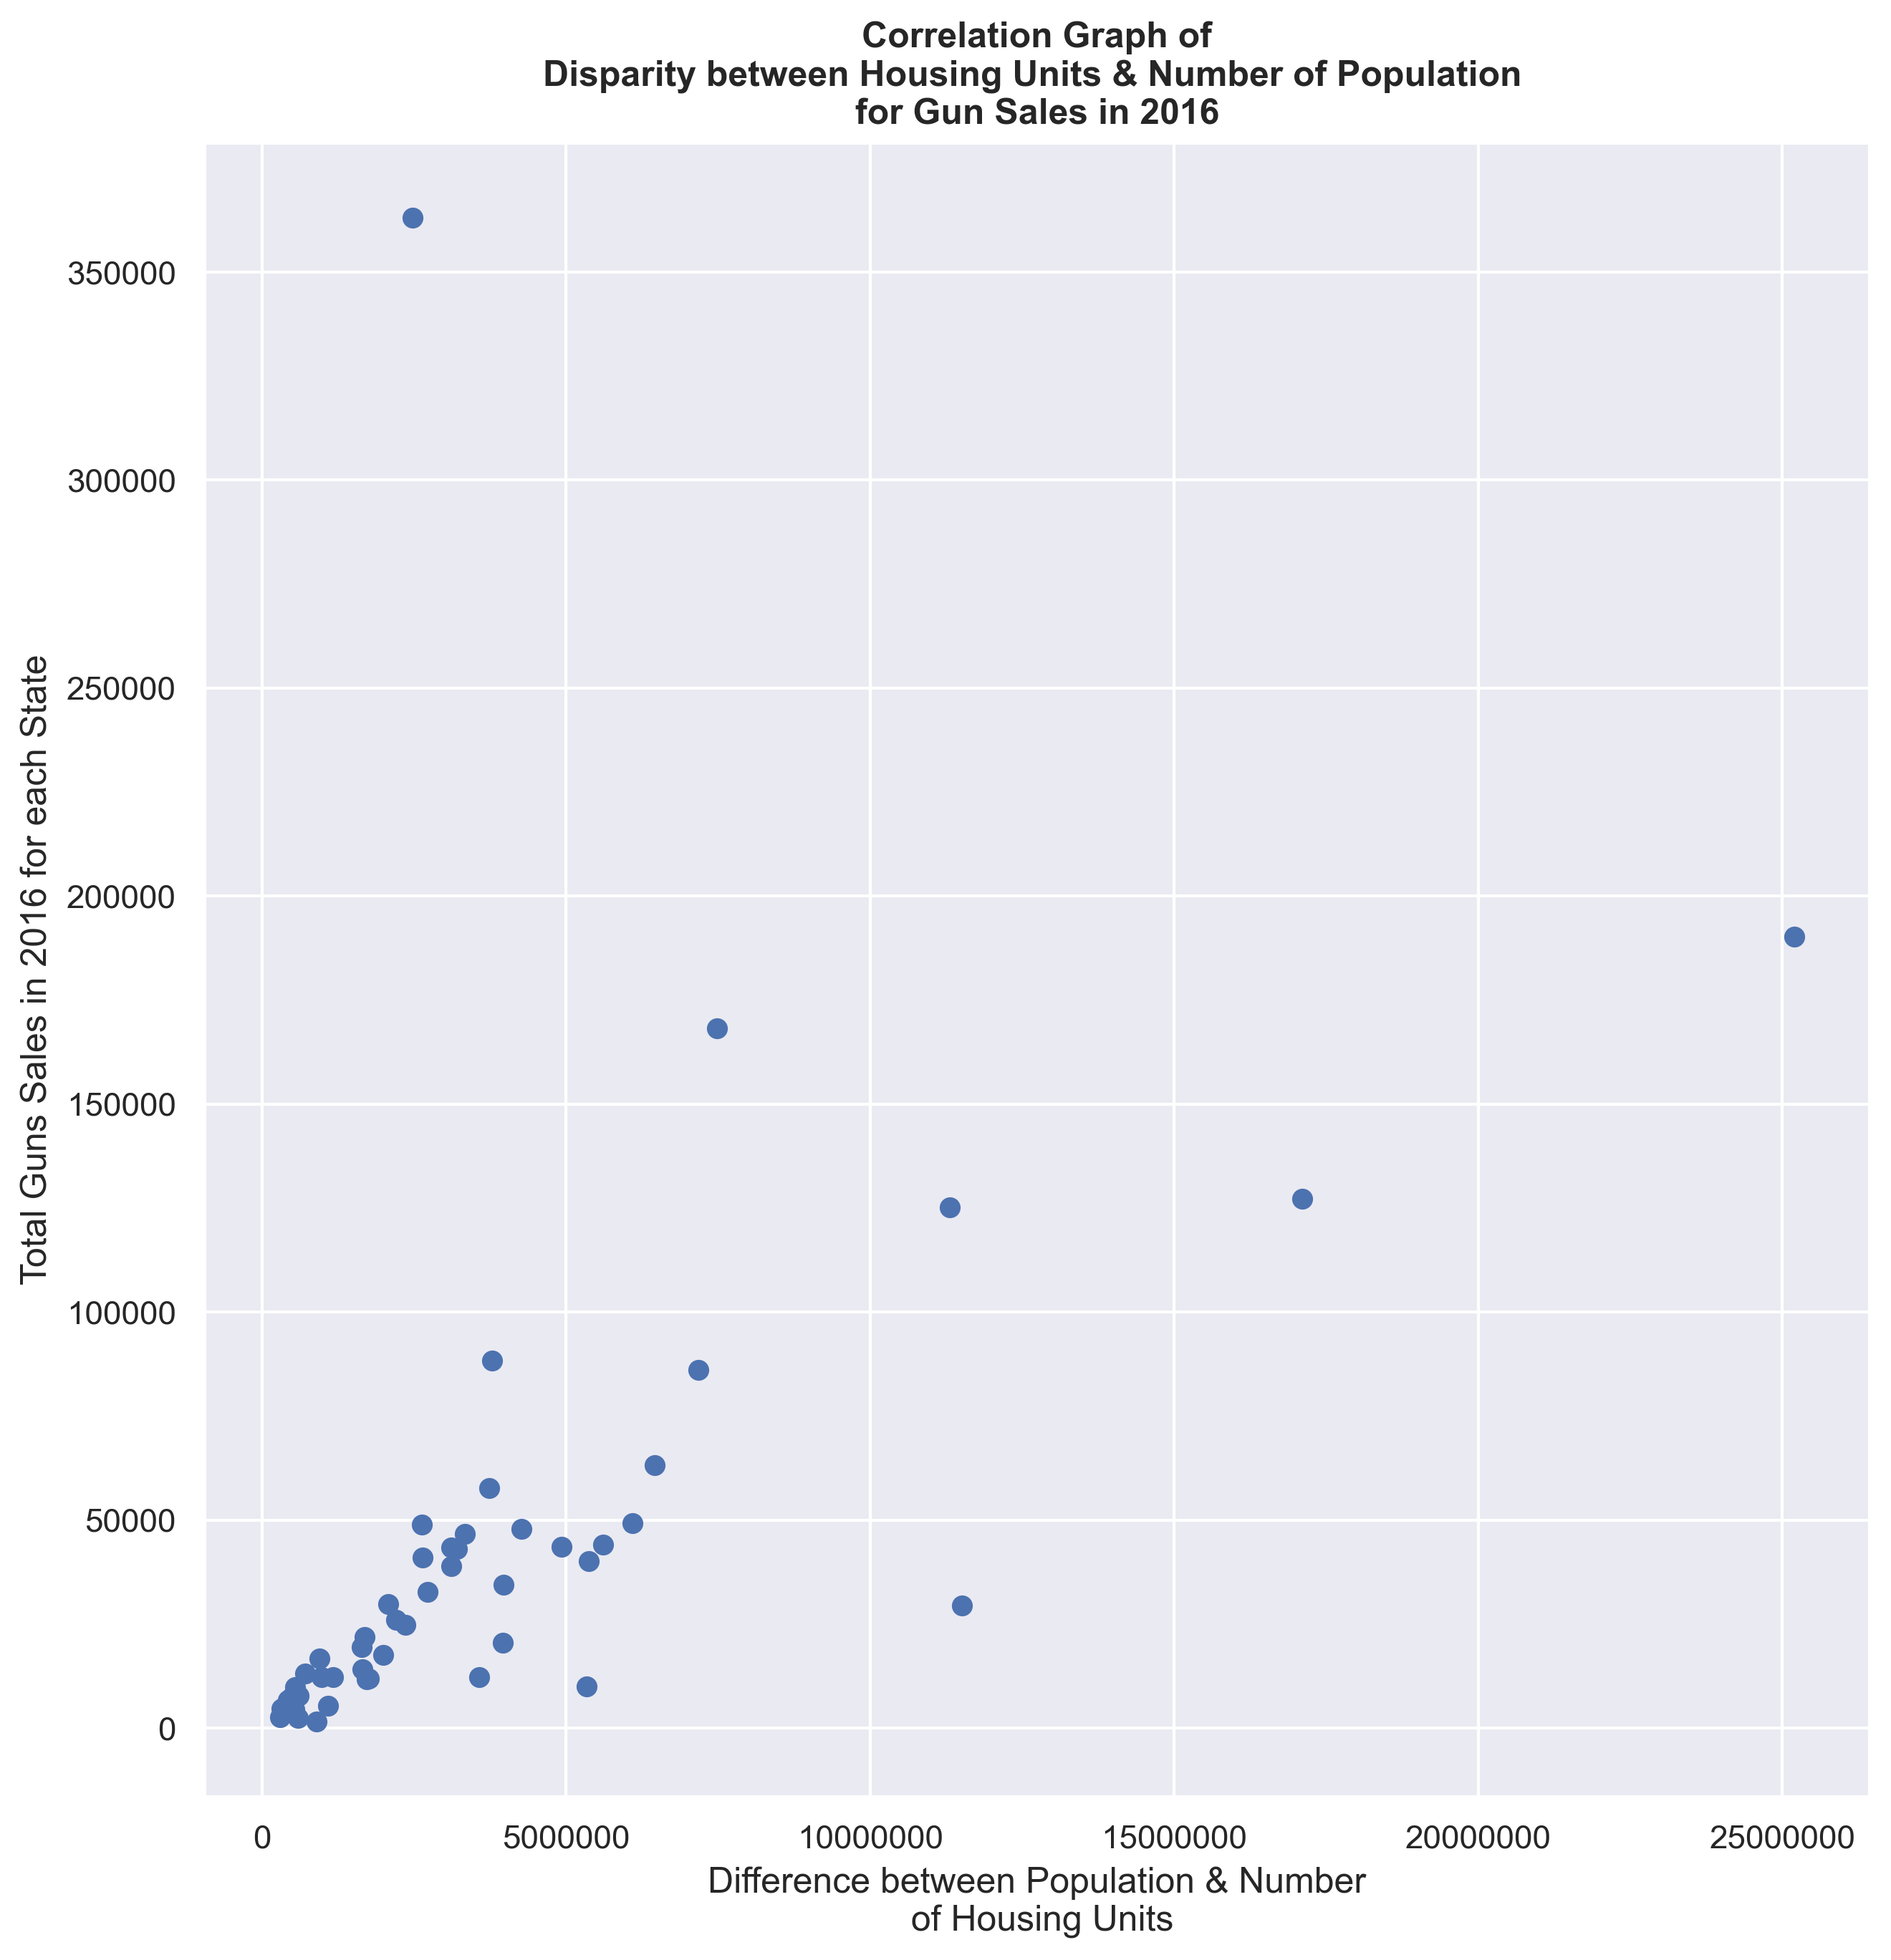

In [377]:
scatter_plot(
    [10,10], 
    300,
    'Total Guns Sales in 2016 for each State',
    'Difference between Population & Number\n of Housing Units',
    'Correlation Graph of\nDisparity between Housing Units & Number of Population \nfor Gun Sales in 2016',
    difference_population_housing_16,
    housing_unit['totals_16']
)

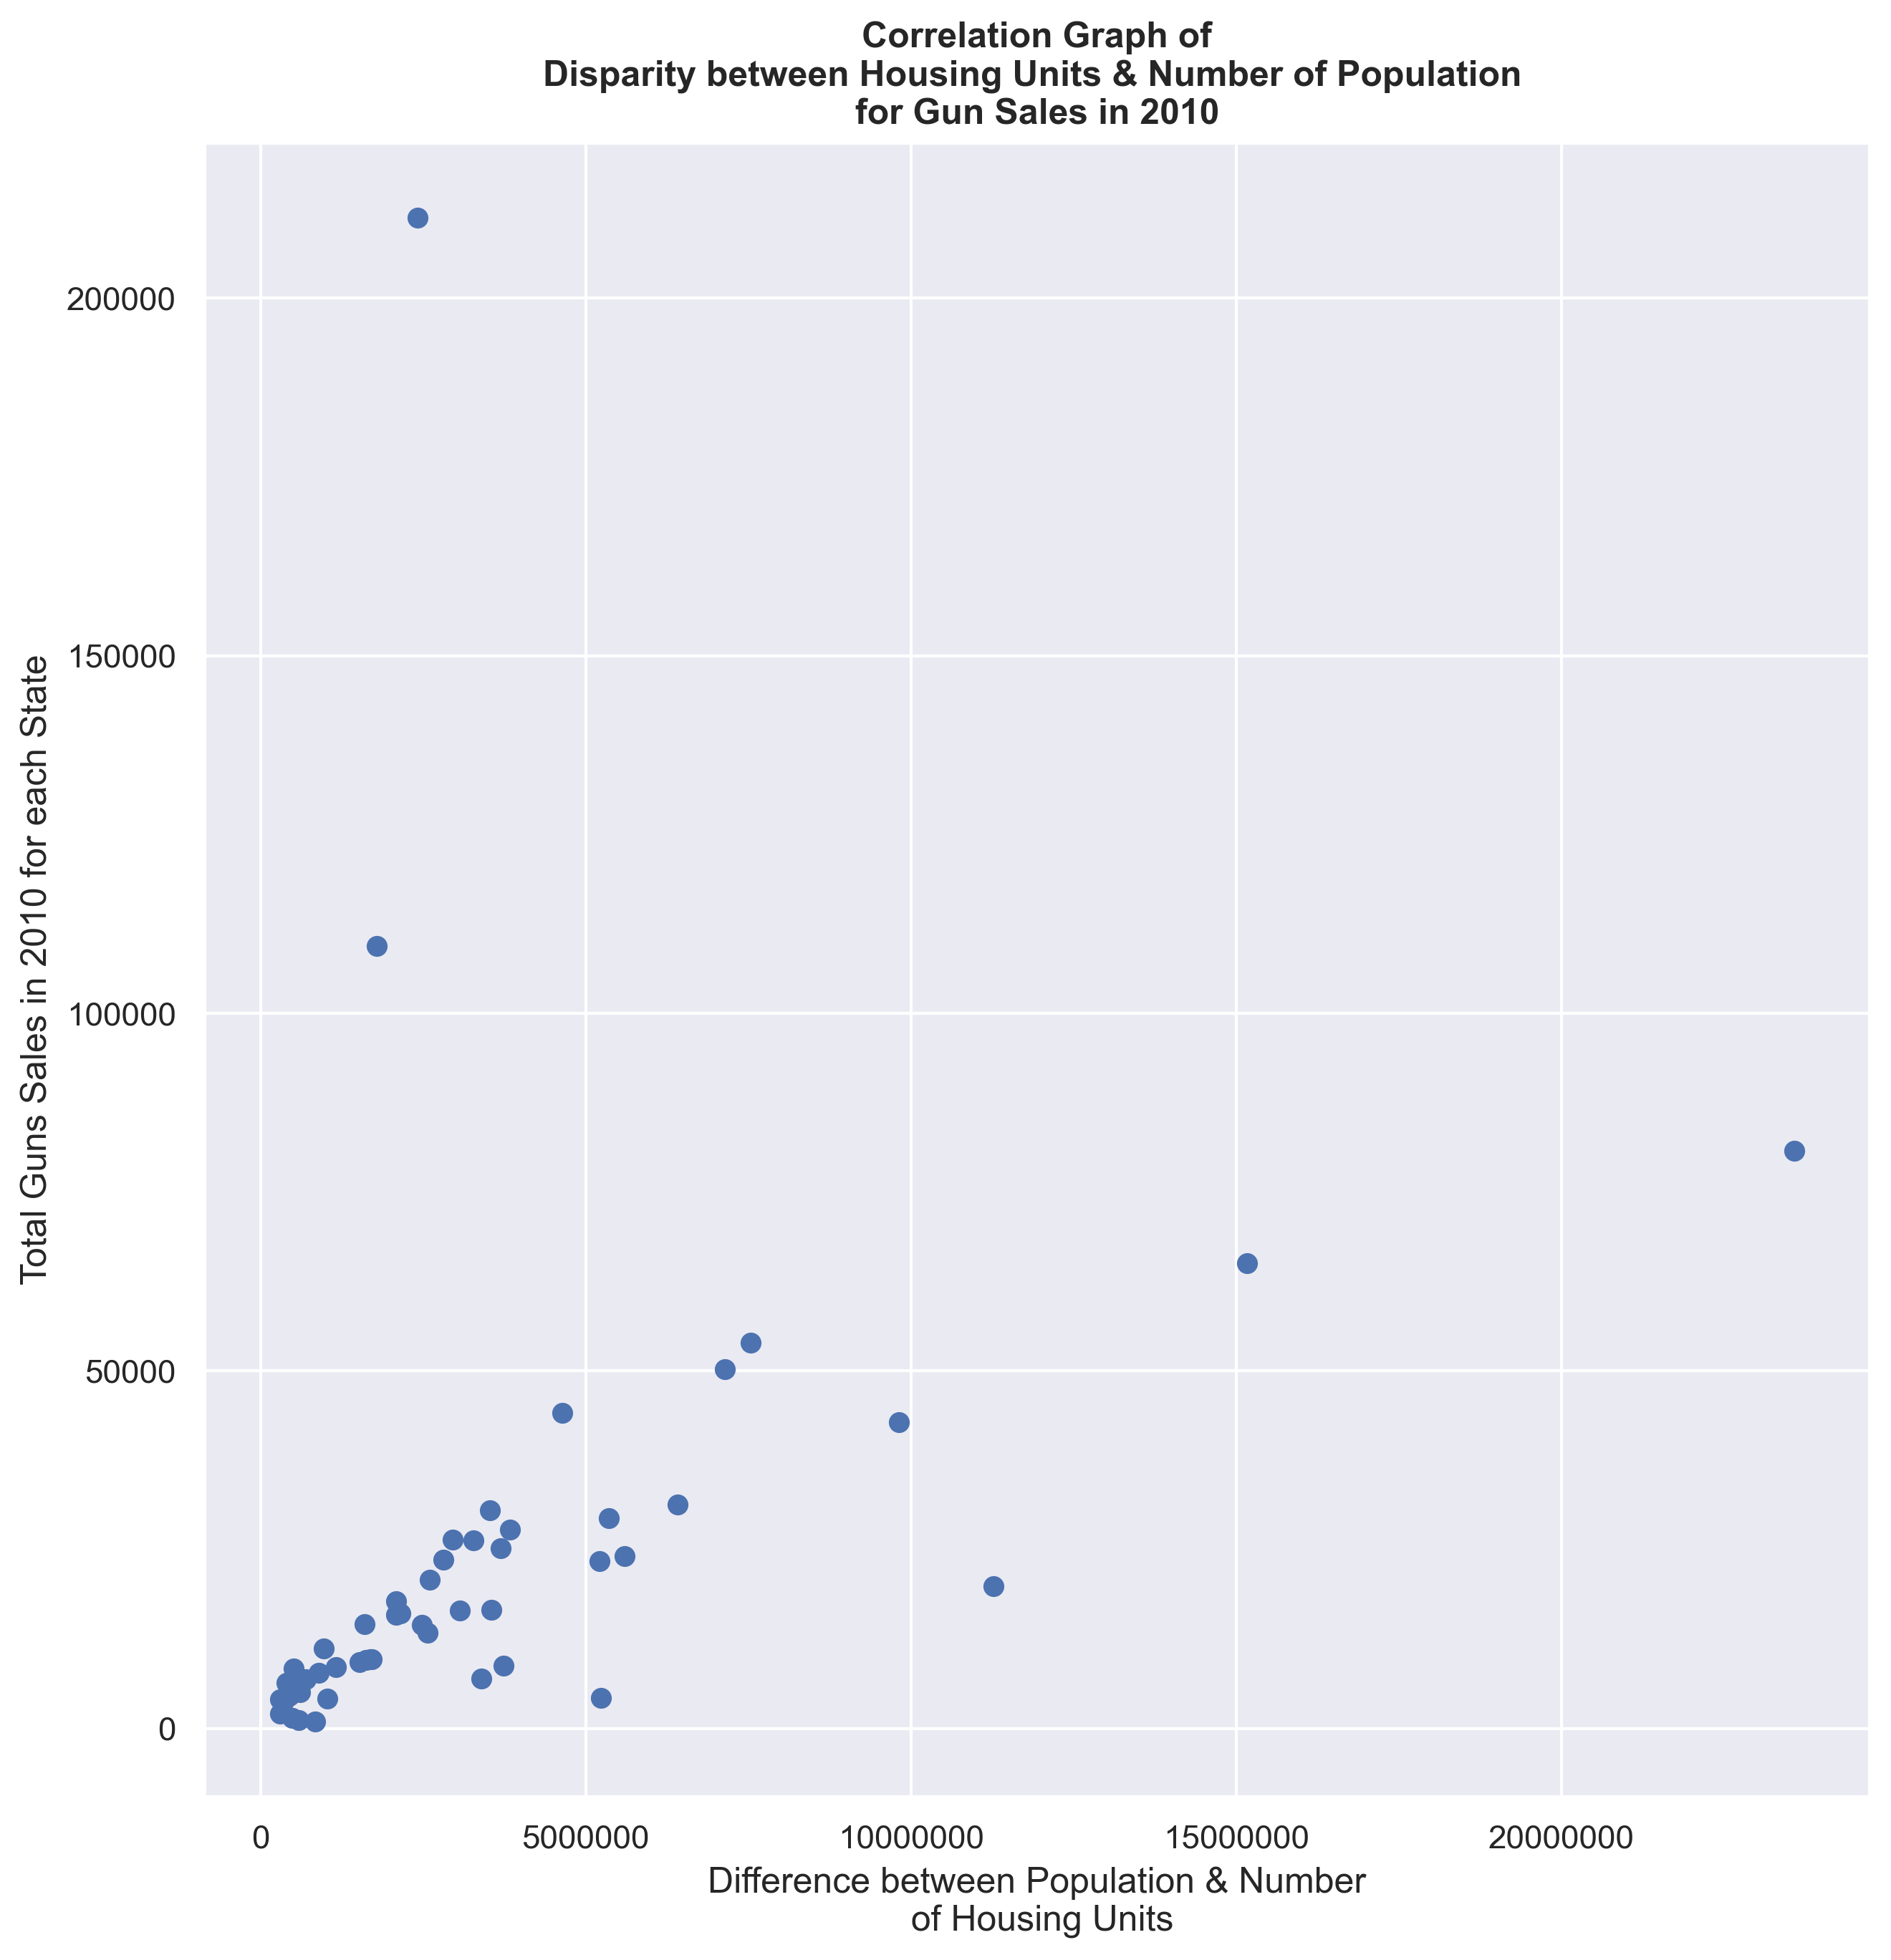

In [378]:
scatter_plot(
    [10,10], 
    300,
    'Total Guns Sales in 2010 for each State',
    'Difference between Population & Number\n of Housing Units',
    'Correlation Graph of\nDisparity between Housing Units & Number of Population \nfor Gun Sales in 2010',
    difference_population_housing_10,
    housing_unit['totals_10']
)

<a id='conclusions'></a>
## Conclusions
This document explores the correlation between gun purchases and various factors, such as race, gender, and veteran population. It was found that Kentucky had the highest gun sales in both 2010 and 2016, and that the female population was more likely to purchase arms than the male population. Additionally, a positive correlation is found between the difference in housing units and population, and the number of guns sold.

Further investigation was done on the influence of veteran population on gun purchases by comparing the states with the highest and lowest gun sales in 2010 and 2016. By analyzing the veteran population of these states, we were  able to understand if there is a correlation between the two.

Although the data provided was highly informative regarding many aspects of the US Census and the gun background checks, certain caveats remain that render this investigation inconclusive. Further data should be gathered to achieve more accurate results, such as the median salary of the female population, the educational background of each racial group, the economic status of the veteran population, and so forth. In addition, the fact mentioned in the introduction, that there is no one-to-one correlation between firearm background checks and sales due to varying state laws and purchase scenarios, is a significant factor that prevents the data from accurately depicting gun sales.